realfake_vidhub_16x9.avif

# The Aim of the project is to identify  Fake & Real news  using Natural Language Processing.

## Problem Statement: 

* The problem at hand is **to develop an effective and reliable system for detecting real or fake news using Natural Language Processing (NLP) techniques**. Given the exponential growth of online content and the increasing spread of misinformation, it has become crucial to **distinguish between trustworthy and deceptive news sources**. This problem statement aims to **address the challenge of accurately identifying and classifying news articles or information as genuine or fabricated, utilizing advanced NLP algorithms and methodologies**.

* The proposed system should be capable of **analyzing the textual content of news articles**, considering various linguistic and contextual features, and assessing their credibility and authenticity. It should be able to **differentiate between accurate, fact-based reporting and deceptive, misleading information by leveraging techniques such as text classification, sentiment analysis, semantic understanding, and linguistic pattern recognition**.

* Ultimately, the **goal is to develop an NLP-based solution that aids users, media organizations, and fact-checkers in distinguishing between genuine and fabricated news, contributing to the fight against misinformation and promoting trustworthy sources of information in the digital landscape**.

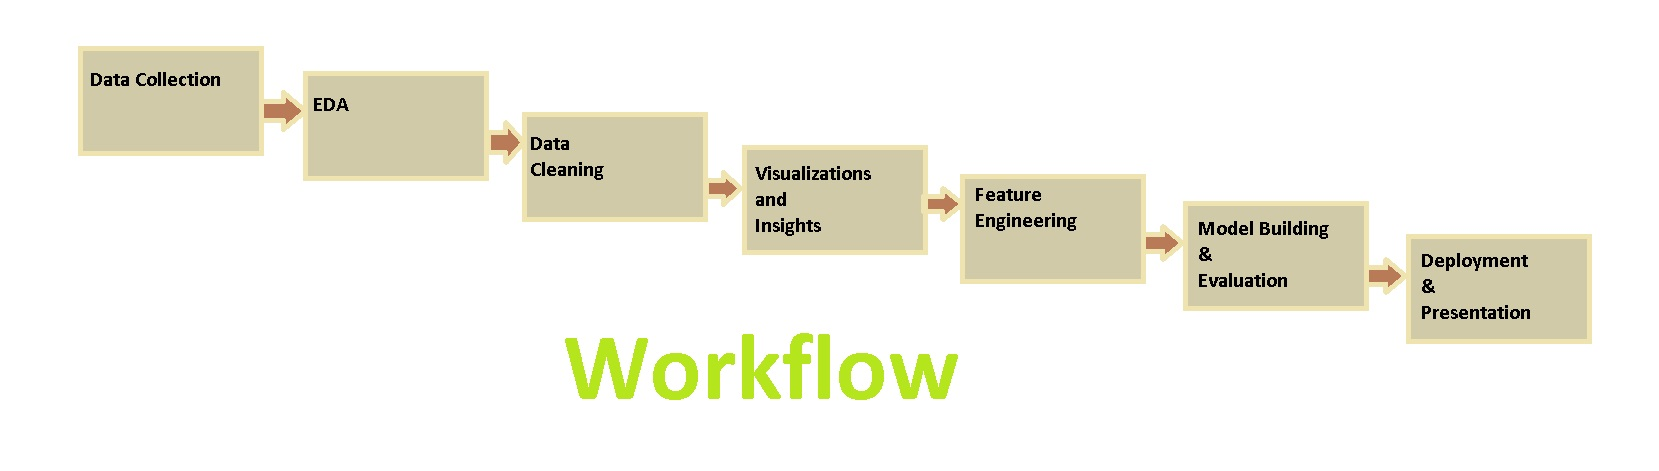

## Importing Basic Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import re
import string
from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.feature_extraction.text import TfidfVectorizer

#models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
# Using k-folds
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
import torch

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

## Step 1 Data Collection 
##### In this step we are extracting data from two csv Files One for Fake news and one for Real news

In [2]:
# Increasing the width of the the columns
pd.set_option('display.max_colwidth', None)

In [3]:
# Loading Both News dataset
# fake_news
fake=pd.read_csv('Fake.csv',encoding = 'latin-1')
fake.head(2)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Years Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",News,31/12/2017
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the fo

In [4]:
# Real_news
real=pd.read_csv('True.csv',encoding='latin-1',on_bad_lines='skip')
real.head(2)

title  \
0  As U.S. budget fight looms, Republicans flip their fiscal script   
1  U.S. military to accept transgender recruits on Monday: Pentagon   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

## Step 2 Exploratary Data Analysis 

#### We will browse through the data and collect some valuable insights with the help of Tables and Visual Plots 

In [5]:
# checking shapes
print(fake.shape)
real.shape

(23450, 4)


(21416, 4)

In [6]:
print(fake.info())
print('-------------------------')
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23450 entries, 0 to 23449
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23450 non-null  object
 1   text     23450 non-null  object
 2   subject  23450 non-null  object
 3   date     23450 non-null  object
dtypes: object(4)
memory usage: 732.9+ KB
None
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
# converting fake datatype of date column 
fake['date']=pd.to_datetime(fake['date'],errors='coerce')
# converting real datatype of date column 
real['date']=pd.to_datetime(real['date'],errors='coerce')

In [8]:
print(fake.date.dtype)
print(real.date.dtype)

datetime64[ns]
datetime64[ns]


In [9]:
# checking duplicate rows for fake news
print(fake.duplicated().sum())
# checking duplicate rows for real news
real.duplicated().sum()

3


206

In [10]:
fake=fake.drop_duplicates()
real=real.drop_duplicates()
print(fake.duplicated().sum())
real.duplicated().sum()

0


0

In [11]:
# Missing values
print(fake.isnull().sum())
print('-------------------------')
real.isnull().sum()

title       0
text        0
subject     0
date       35
dtype: int64
-------------------------


title      0
text       0
subject    0
date       0
dtype: int64

### Observation:
#### There are 35 rows in the fake news dataset with the date labeled as "Nat," indicating invalid or missing date entries.

In [12]:
# Creating new dataFrame with all null values of date
nan_date= fake[fake['date'].isnull()]
print(nan_date.shape)
nan_date.head()

(35, 4)


,title,text,subject,date
9050,Democrat Senator Warns Mueller Not To Release Findings On Russia Before 2018 Midterms,"According to The Hill, Democrat Senator Bob Casey is warning special counsel Robert Mueller against issuing his Russia report near the 2018 electionSen. Bob Casey Jr. (D-Pa.) on Sunday warned special counsel Robert Mueller against issuing a report on his findings in the ongoing investigation of Russian interference in the 2016 election near the upcoming 2018 midterm elections.Speaking to radio host John Catsimatidis on New York radio station AM 970, Casey said he couldn t make any assumptions about where the Mueller investigation is going in light of indictments issued on Friday. But he added that he would recommend Mueller not release a report on his findings near the midterms when it would distract from elections or cause people to question the election s integrity. I don t think we ll know anywhere near the full story until [Mueller] issues his report, Casey said. But once you get into the summer, and you get close to the election, I think it s a mistake for him to release it late. I think you should wait until after [the election] Casey said.",politics,NaT
9051,MSNBC ANCHOR Flabbergasted at What Texas Teachers Do to Protect Their Students [Video],"If we protect every other government building or public venue with armed guards, why shouldn t our schools be protected with armed teachers? A Texas Sheriff shocked an MSNBC host when he discussed how he prepares local teachers to be armed in the classroom. common sense solution? You betcha!Sheriff Paul Cairney of Argyle, Texas, described the process by which staff members can carry firearms in the school district. The Sheriff said that the staff at the school who choose to carry a firearm go through an intense round of interviews and training before they are allowed to carry on campus. The MSNBC host was flabbergasted at the practice and asked the Sheriff about concerns for the safety of the students in the school when there are firearms around.Sheriff Cairney: The time to do nothing is over THE PROCESS TO BECOME A SCHOOL MARSHALL:To become a school marshal, those employees must undergo extensive active shooter and firearms training with the state. They must also undergo a mental health evaluation. They receive a school marshal designation by the Texas Commission on Law Enforcement and must renew their license every two years by undergoing the same training and evaluation. Outside of campuses in Keene and Argyle, signs warn visitors that there are staff members who are armed and are prepared to protect children.",politics,NaT
9052,WATCH: SNOWFLAKES ASKED Communist Party Platform or Democratic Party Platform? [Video],"Ami Horowitz is fantastic! Check out this man on the street effort to see how much snowflakes know about what they profess to support. Have the Democrats gone so far to the left that they can t tell the difference between their party platform and that of the communists? It s an eyeopener!If you haven t seen Ami Horowitz before, he has a fantastic video about sharia law in America:Ami Horowitz hits the streets of Minnesota to find out if the Somali Muslims there understand that American law is the only law. They don t get it and say that they prefer Sharia law. Do you think that if we keep bringing over thousands and thousands of Muslims that they will want to keep our law? Think about it Dana Loesch speaks with the filmmaker Ami Horowitz:",politics,NaT
9053,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chinese Security Officials Hand Off US Military Aide Carrying Nuclear Football During Trump Meeting In Beijing,"Just one more reminder of why President Trump chose the no-nonsense General John Kelly to be his chief of staff On Thursday, Nov. 9, when President Trump and his team visited Beijing s Great Hall of the People, Chief of Staff John Kelly and a U.S. Secret Service agent skirmished with Chinese security officials over the nuclear football.I ve spoke

In [13]:
nan_date['subject'].value_counts()

subject
politics    35
Name: count, dtype: int64

##### Observation:
It seems that dates containing with null value are all from fake news with political background only..

In [14]:
# Dropping null values
fake=fake.dropna()
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [15]:
# checking if there are any blank text in text column
fake[fake['text']==' '].head(20)

,title,text,subject,date
10921,TAKE OUR POLL: Who Do You Think President Trump Should Pick To Replace James Comey?,,politics,2017-05-10
11039,Joe Scarborough BERATES Mika Brzezinski Over Cheap Shot At Ivanka Trump: You dont have to be so snotty! [VIDEO],,politics,2017-04-26
11188,WATCH TUCKER CARLSON Scorch Sanctuary City Mayor: Dont you believe in laws? [Video],,politics,2017-04-06
11223,MAYOR OF SANCTUARY CITY: Trump Trying To Make Us Fugitive Slave Catchers [Video],,politics,2017-04-02
11234,SHOCKER: Public School Turns Computer Lab Into Mosque&Bars Non-Muslim Students [Video],,politics,2017-04-01
11239,BOOM! SEAN SPICER: Trump Sold Hotels In Russia While Hillary Clinton Sold Uranium,,politics,2017-03-31
11245,MICHAEL FLYNNS LAWYER Releases Statement Scorching Highly Politicized Witch Hunt,,politics,2017-03-30
11247,ROB SCHNEIDER Nails The Russia Conspiracy Theorists In One Hysterical Tweet,,politics,2017-03-30
11265,TREY GOWDY ON SPYING ON AMERICAN CITIZENS&Like President Trump! [Video],,politics,2017-03-28
11266,SEAN SPICER CALLS OUT Race Baiting Journalist: Stop Shaking Your Head Again [Video],,politics,2017-03-28


##### Observations:
 With blank descriptions 626 are identified as fake news

In [16]:
blank_text=fake[fake['text']==' ']

In [17]:
blank_text['subject'].value_counts()

subject
politics           406
left-news          149
Government News     71
Name: count, dtype: int64

In [18]:
# checking if there are any blank text in text column
real[real['text']==' ']

,title,text,subject,date
8970,Graphic: Supreme Court roundup,,politicsNews,2016-06-01


##### Observations: 
 * wherever there is blank text in the text column, the title column contains information about "Video" or "Poll"
 

In [19]:
# Remove rows with blank text in the 'text' column
fake = fake[fake['text'] != ' ']
real = real[real['text'] != ' ']
print(fake[fake['text']==' '])
real[real['text']==' ']

Empty DataFrame
Columns: [title, text, subject, date]
Index: []


,title,text,subject,date


In [20]:
print(fake.shape)
real.shape

(22786, 4)


(21209, 4)

## Step 3 Date visualizations

### subject column 

In [21]:
fake['subject'].value_counts()

subject
News               9050
politics           6389
left-news          4305
Government News    1497
US_News             775
Middle-east         770
Name: count, dtype: int64

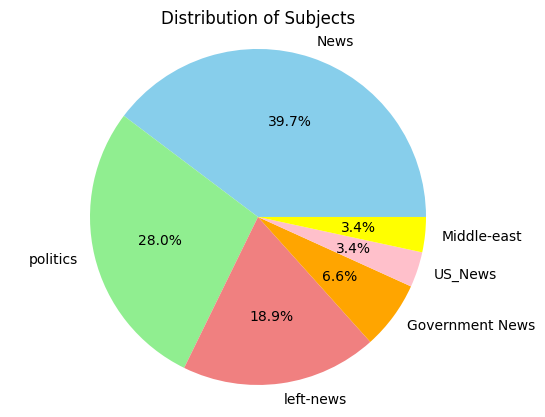

In [22]:
# analysing subject column of fake news

# Create a pie chart
# Define colors for the pie slices
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'pink','yellow']
subject_count = fake['subject'].value_counts()
subject_labels = subject_count.index.tolist()

# Create the pie chart with percentage labels
plt.pie(subject_count, labels=subject_labels, colors=colors, autopct='%1.1f%%')
# Set aspect ratio to make the pie chart circular
plt.axis('equal')
# Set a title for the pie chart
plt.title('Distribution of Subjects')
# Display the chart
plt.show()

 #### Observations:
 * Fake news has five subjects in which 'news' subject has high rate of publishing fake news
 and possibility of publishing fake news from US news & middle east are too low.

In [23]:
real['subject'].value_counts()

subject
politicsNews    11218
worldnews        9991
Name: count, dtype: int64

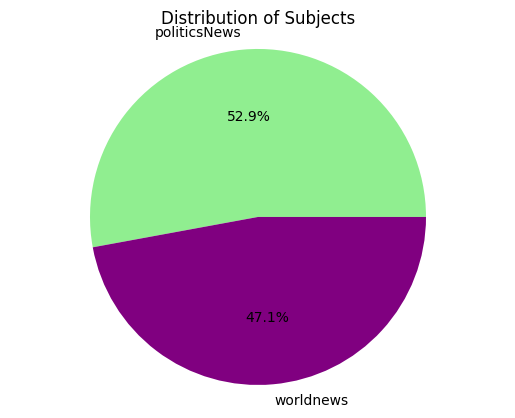

In [24]:
# analysing subject column of real news

# Create a pie chart
# Define colors for the pie slices
colors = ['lightgreen', 'purple']
subject_count = real['subject'].value_counts()
subject_labels = subject_count.index.tolist()

# Create the pie chart with percentage labels
plt.pie(subject_count, labels=subject_labels, colors=colors, autopct='%1.1f%%')
# Set aspect ratio to make the pie chart circular
plt.axis('equal')
# Set a title for the pie chart
plt.title('Distribution of Subjects')
# Display the chart
plt.show()

#### Observations:
* By comparing fake & real news subjects,we can conclude that the news related to worldnews subjects were real news.

* Real news articles on 'politics' topic are more than fake news articles.
##### so we can say that this feature is important but we cant use this feature for model building as categories in both subject columns are not same i.e it is not one on one mapping..so we will drop this column

 ### Date column 

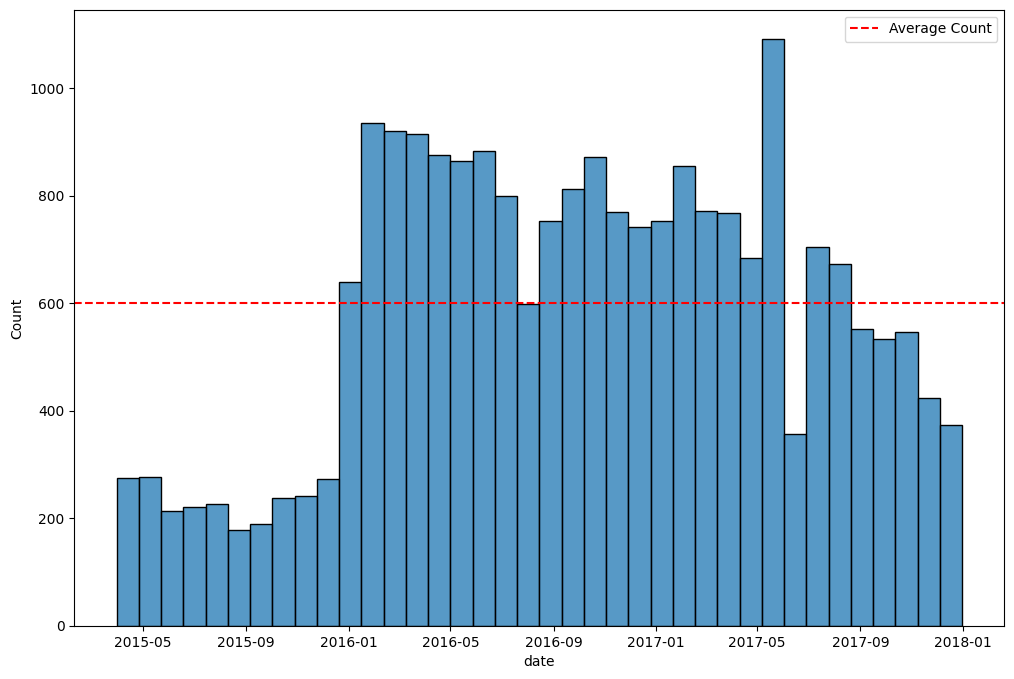

In [25]:
# Analysing Date column of fake news
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=fake, x="date")
# Calculate the average value for the count
bin_heights, bin_edges, _ = ax.hist(fake["date"], bins='auto', alpha=0)
average_value = np.mean(bin_heights)
plt.axhline(y=average_value, color='red', linestyle='--', label='Average Count')
plt.legend()
plt.show()

### Observations:
#### average of fake news counts are around 600 per Month

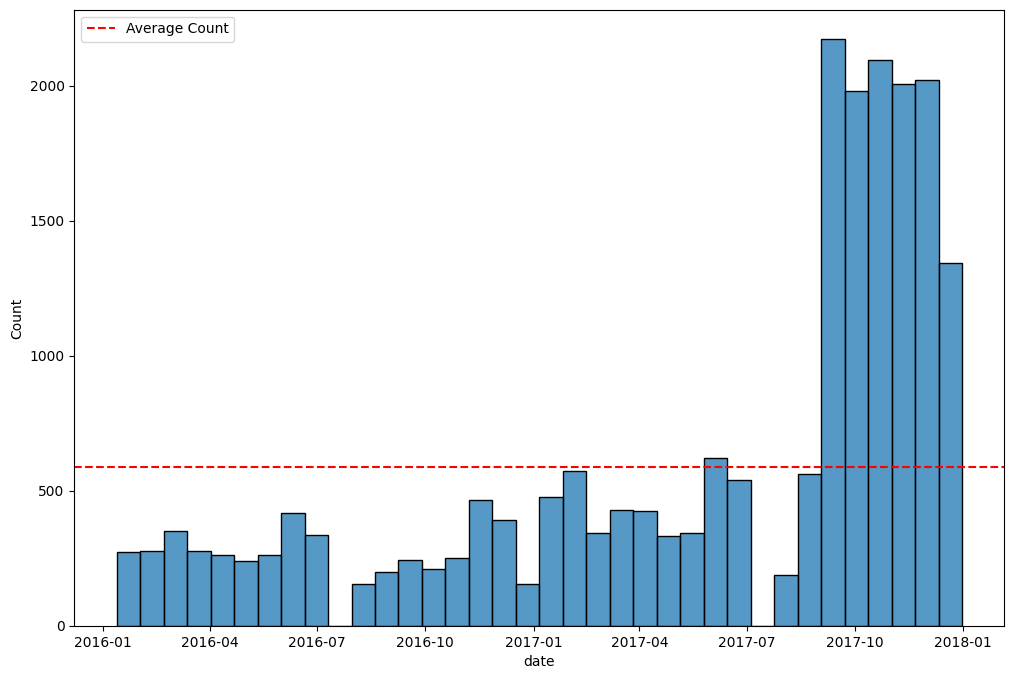

In [26]:
# Analysing Date column of real news
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=real, x="date")
# Calculate the average value for the count
bin_heights, bin_edges, _ = ax.hist(real["date"], bins='auto', alpha=0)
average_value = np.mean(bin_heights)
# Add the average value line
plt.axhline(y=average_value, color='red', linestyle='--', label='Average Count')
plt.legend()
plt.show()

##### Observations:
* From above graph we can say that in october,november & december month releasing real news rates were very high and average of real news counts are around 600 per month.

* By comparing fake and real news Date column ,news release at end of year were real news.
* But we cant interprete insights from date column of fake news..its need to be further analysis.

In [27]:
# Creating target column
real['Class']='True'
fake['Class']='Fake'

In [28]:
# concanating two dataframes
df=pd.concat([real,fake])
df.reset_index(inplace=True)
df.shape

(43995, 6)

In [29]:
# Extracting month and year from date column
df['Month'] = df['date'].dt.strftime('%B')
df['Year'] = df['date'].dt.year
df.head()

index  \
0      0   
1      1   
2      2   
3      3   
4      4   

                                                                   title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [30]:
# Monthwise news count
pd.crosstab(df['Class'],df['Month'])

Month,April,August,December,February,January,July,June,March,May,November,October,September
Class,,,,,,,,,,,,
Fake,2082,1902,1577,1843,2033,1949,1914,2044,2138,1689,1889,1726
True,911,916,2838,1017,995,875,972,1168,898,3716,3491,3412


### Observations:
#### count of fake new in month of January,April,May,June,July,August..i.e in the middle year rate of publishing fake news was maximum

In [31]:
# Yearwise news count
pd.crosstab(df['Class'],df['Year'])

Year,2015,2016,2017
Class,,,
Fake,2417,11432,8937
True,0,4699,16510


<Axes: xlabel='Class'>

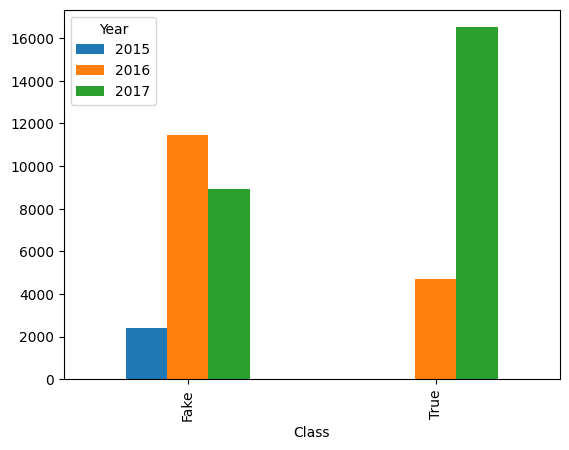

In [32]:
pd.crosstab(df['Class'],df['Year']).plot(kind='bar')

### Observations:
#### The year 2016 saw a higher percentage of fake news articles, with around 11,000 fake news articles and only 4,700 true news articles. In contrast, the year 2017 had 9,000 fake news articles and 16,500 true news articles.

In [33]:
# 2016 news analysis-As it has maximum fake news
df_2016= df[df['Year']==2016]
df_2016.shape

(16131, 8)

In [34]:
# Month analysis wrt class in 2016
a=pd.crosstab(df_2016['Month'],df_2016['Class'])
b= pd.DataFrame(a)

In [35]:
# calculating % difference
b['Percentage_fake']=round((b['Fake']/b['True'])*100)
b

Class,Fake,True,Percentage_fake
Month,,,
April,975,383,255.0
August,888,265,335.0
December,834,422,198.0
February,1018,428,238.0
January,1081,245,441.0
July,882,337,262.0
June,868,417,208.0
March,1085,489,222.0
May,1011,394,257.0


<Axes: xlabel='Month'>

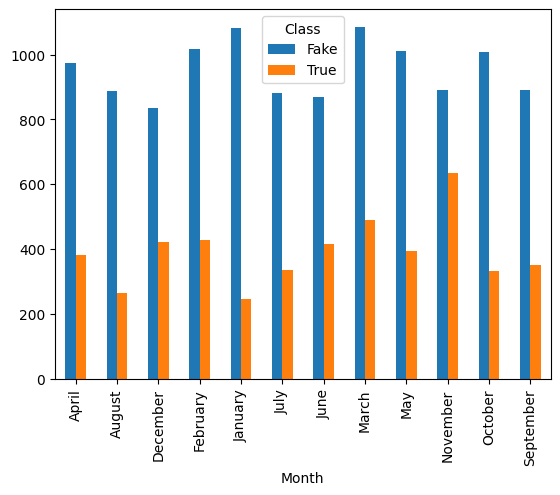

In [36]:
# crosstab visualization for month column in 2016
pd.crosstab(df_2016['Month'],df_2016['Class']).plot(kind='bar')

### Title column 

In [37]:
fake['title_length'] = fake['title'].apply(len)     #word count
average_title_length = fake['title_length'].mean()
average_title_length

94.22592820152725

In [38]:
real['title_length'] = real['title'].apply(len)
average_title_length_r = real['title_length'].mean()
average_title_length_r

64.66019142816728

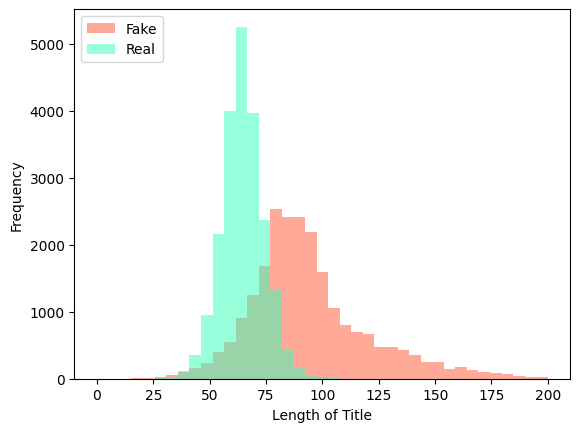

In [39]:
# word count of title column

# Define the bins for the histograms      
bins = np.linspace(0, 200, 40)         #to create 40 equally spaced bins between 0 and 200.

# Plot the histogram for the "length_title" column in the fake DataFrame
plt.hist(fake["title_length"], bins=bins, alpha=0.5, label="Fake", color="#FF5733")
# Plot the histogram for the "length_title" column in the real DataFrame
plt.hist(real["title_length"], bins=bins, alpha=0.5, label="Real", color="#33FFB8")

# Add labels to the x-axis and y-axis
plt.xlabel("Length of Title")
plt.ylabel("Frequency")
# Add a legend to the plot
plt.legend(loc="upper left")
# Show the plot
plt.show()

### Observations:

* Real news titles tend to have shorter lengths, primarily up to 100 characters, while fake news titles can be longer, reaching up to 200 characters.

* The "length of title" can be considered as a potentially important feature for model building, as it appears to show some differences between real and fake news. The fact that real news titles are generally shorter could be a useful characteristic for classification purposes.

** Reuters word analysis **

In [40]:
# for real
rows_con_reuters = real[real['text'].str.contains('Reuters')]
rows_con_reuters.shape

(21171, 6)

In [41]:
# for fake
rows_con_reuters_f = fake[fake['text'].str.contains('Reuters')]
rows_con_reuters_f.shape

(308, 6)

### Observations:
The word "Reuters," which is a well-known US news agency, is commonly found in the real news dataset, appearing in 21,171 out of 21,210 rows. In contrast, it appears only 308 times out of 23,447 rows in the fake news dataset.
#### This is important feature for identifying real and fake news.

#### URL

In [42]:
url_pattern = r'https?://(?:www\.)?\S+'

In [43]:
url_pattern = r'https?://\S+'

In [44]:
# Function to find links in text and return zero if no links are found
def find_links(text):
    links = re.findall(url_pattern, str(text))
    return len(links) if links else 0

# Function to find links in text and return 1 if links are found, otherwise return 0
#def find_links(text):
    #links = re.findall(url_pattern, str(text))
    #return 1 if links else 0

In [45]:
# Apply the function to the 'text' column and create the 'links' column
fake['links_count'] = fake['text'].apply(find_links)
# Apply the function to the 'text' column and create the 'links' column
real['links_count'] = real['text'].apply(find_links)# Function to find links in text and return 1 if links are found, otherwise return 
fake.head(5)

,title,text,subject,date,Class,title_length,links_count
0,Donald Trump Sends Out Embarrassing New Years Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",News,2017-12-31,Fake,79,0
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the 

In [46]:
print(fake['links_count'].sum())
print(real['links_count'].sum())

4639
0


In [47]:
4639/23450

0.19782515991471214

### Observations:

#### As % of url present in fake dataset is 20% & in real news it is zero ,so it will be important feature to identify real and fake news.

#### Text column 

# Text Processing

* Converting into Lower case

In [48]:
fake['text']=fake['text'].str.lower()
real['text']=real['text'].str.lower()
print(fake.head(2))
real.head(2)

                                                                             title  \
0   Donald Trump Sends Out Embarrassing New Years Eve Message; This is Disturbing   
1             Drunk Bragging Trump Staffer Started Russian Collusion Investigation   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

title  \
0  As U.S. budget fight looms, Republicans flip their fiscal script   
1  U.S. military to accept transgender recruits on Monday: Pentagon   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

### Removing other unwanted Pattern

In [49]:
def clean_text(text):
    text = re.sub('@[\w]*', '', text)         # @
    text = re.sub("[0-9" "]+", '',text)       # no's
    text = re.sub('[‘’“”…]', '', text)       
    text = re.sub("\s+[a-z]\s+", " ",text)   #  a b c-----single letter
    text = re.sub("\W", " ", text)           #	*-+=)
    #text = re.sub('http[^\s]+', '',text)
    return text

clean = lambda x: clean_text(x)

fake["clean_text"] = fake["text"].apply(clean_text) # Clean The Text
real["clean_text"] = real["text"].apply(clean_text)

### Tokenization ,Stamming ,Removing stopwords & punctuation

           -stemming-word is converted into its non-changing portions.
           -lammitization-it maintain dictionary word form

In [50]:
# for fake dataset

# Tokenize
fake['tokenized_text'] = [nltk.word_tokenize(x) for x in fake['clean_text']]

# list of Stopwords & punctuations
stop_words = list(set(stopwords.words('english')))+list(punctuation)+['getti','pic','www','featur','featured','image','subscrib','becom','captur','wire','say','imag','video','screen','via','st','com','said','show','may','ask','one say','even','make']
# Removing stopword & punctuations 
fake['tokenized_text'] = fake['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])

#lemmatizer = WordNetLemmatizer()
#fake_news['lemma_text'] = fake_news['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
#fake_news['lemma_text'] = fake_news['lemma_text'].apply(lambda x: ' '.join(x))
#fake_news.head()

# stemming words
stemmer = PorterStemmer()
fake['stem_text'] = fake['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])
fake['stem_text'] = fake['stem_text'].apply(lambda x: ' '.join(x))
fake.head()

,title,text,subject,date,Class,title_length,links_count,clean_text,tokenized_text,stem_text
0,Donald Trump Sends Out Embarrassing New Years Eve Message; This is Disturbing,"donald trump just couldn t wish all americans a happy new year and leave it at that. instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. the former reality show star had just one job to do and he couldn t do it. as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year, president angry pants tweeted. 2018 will be a great year for america! as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year. 2018 will be a great year for america! donald j. trump (@realdonaldtrump) december 31, 2017trump s tweet went down about as welll as you d expect.what kind of president sends a new year s greeting like this despicable, petty, infantile gibberish? only trump! his lack of decency won t even allow him to rise above the gutter long enough to wish the american citizens a happy new year! bishop talbert swan (@talbertswan) december 31, 2017no one likes you calvin (@calvinstowell) december 31, 2017your impeachment would make 2018 a great year for america, but i ll also accept regaining control of congress. miranda yaver (@mirandayaver) december 31, 2017do you hear yourself talk? when you have to include that many people that hate you you have to wonder? why do the they all hate me? alan sandoval (@alansandoval13) december 31, 2017who uses the word haters in a new years wish?? marlene (@marlene399) december 31, 2017you can t just say happy new year? koren pollitt (@korencarpenter) december 31, 2017here s trump s new year s eve tweet from 2016.happy new year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. love! donald j. trump (@realdonaldtrump) december 31, 2016this is nothing new for trump. he s been doing this for years.trump has directed messages to his enemies and haters for new year s, easter, thanksgiving, and the anniversary of 9/11. pic.twitter.com/4fpae2kypa daniel dale (@ddale8) december 31, 2017trump s holiday tweets are clearly not presidential.how long did he work at hallmark before becoming president? steven goodine (@sgoodine) december 31, 2017he s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. roy schulze (@thbthttt) december 31, 2017who, apart from a teenager uses the term haters? wendy (@wendywhistles) december 31, 2017he s a fucking 5 year old who knows (@rainyday80) december 31, 2017so, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.photo by andrew burton/getty images.",News,2017-12-31,Fake,79,0,donald trump just couldn wish all americans happy new year and leave it at that instead he had to give shout out to his enemies haters and the very dishonest fake news media the former reality show star had just one job to do and he couldn do it as our country rapidly grows stronger and smarter want to wish all of my friends supporters enemies haters and even the very dishonest fake news media happy and healthy new year president angry pants tweeted will be great year for america as our country rapidly grows stronger and smarter want to wish all of my friends supporters enemies haters and even the very dishonest fake news media happy and healthy new year will be great year for america donald j trump december trump tweet went down about as welll as you expect what kind of president sends new year greeting like this despicable petty infantile gibberish only trump his lack of decency won even allow him to rise above

In [51]:
# for real dataset

# tokenize
real['tokenized_text'] = [nltk.word_tokenize(x) for x in real['clean_text']]

# Stopwords & punctuations
stop_words = list(set(stopwords.words('english')))+list(punctuation)+['said','one','includ','say']
# stopword removal
real['tokenized_text'] = real['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])

# stemming words
stemmer = PorterStemmer()
real['stem_text'] = real['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])
real['stem_text'] = real['stem_text'].apply(lambda x: ' '.join(x))
real.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### Wordcloud 
     -Word clouds visualize the most frequently occurring words in a text

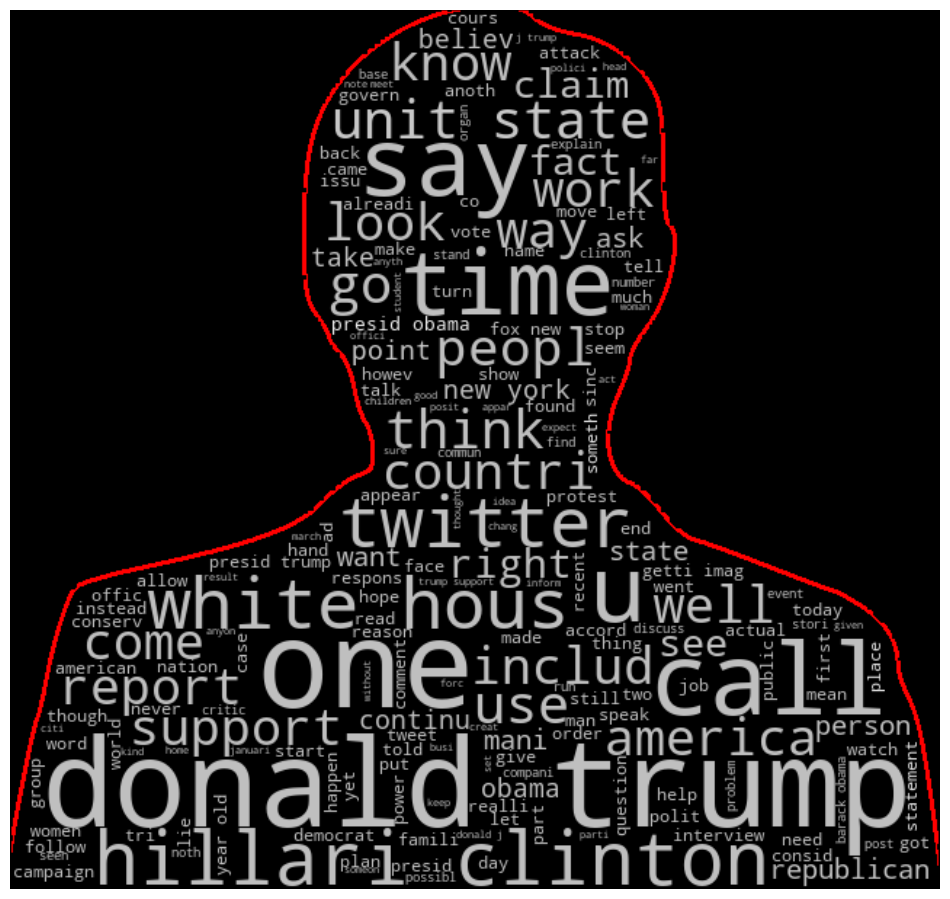

In [52]:
# fake_news

# Concatenate all the 'stem_text' into a single string
string_Total1 = " ".join(fake["stem_text"])

# Load the image mask (make sure to provide the correct path to the image)
mask_path = "D:\\Data Science\\Projects\\fake news -NLP\\R.png"
mask = np.array(Image.open(mask_path))

# Create a WordCloud object and set the image mask
wordcloud = WordCloud(background_color='black', mask=mask, contour_width=1, contour_color='red')
# Generate the word cloud
wordcloud.generate(string_Total1)
# Create a color map from the image to apply to the word cloud
image_colors = ImageColorGenerator(mask)

# Display the word cloud with the mask shape
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud.recolor(color_func=image_colors,random_state=42), interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.show()

### Observations:

* The word cloud for fake news reveals mentions of prominent figures like Donald Trump, Hillary Clinton, and Barack Obama. Political party names like the Republican Party and terms like "said" (indicating statements) are also prevalent. Additionally, the word "Twitter" indicates a common source for spreading fake news.

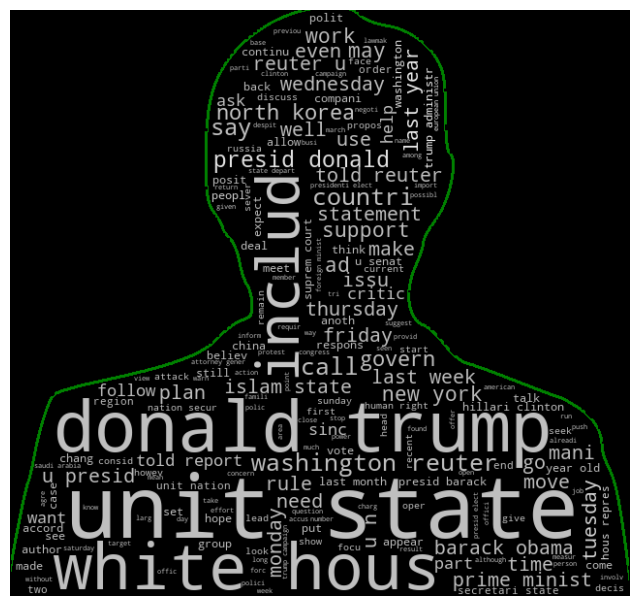

In [53]:
# Real_news

# Concatenate all the 'stem_text' into a single string
string_Total1 = " ".join(real["stem_text"])

# Load the image mask (make sure to provide the correct path to the image)
mask_path = "D:\\Data Science\\Projects\\fake news -NLP\\R.png"
mask = np.array(Image.open(mask_path))

# Create a WordCloud object and set the image mask
wordcloud = WordCloud(background_color='black', mask=mask, contour_width=1, contour_color='green')
# Generate the word cloud
wordcloud.generate(string_Total1)
# Create a color map from the image to apply to the word cloud
image_colors = ImageColorGenerator(mask)

# Display the word cloud with the mask shape
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud.recolor(color_func=image_colors,random_state=42), interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.show()


### Observations:
* The word cloud for real news depicts mentions of weekdays, months, and social issues like racism and the Islamic State. The news agency "Reuters," White House, and Donald Trump are also commonly referenced in true news articles.
* If we observe there are some words in the real which are not in fake like there are many fake news about Cliton.

### N-gram
             N-gram analysis reveals common combinations of words in both fake and real news articles, giving a glimpse into their respective themes and topics. 
             These insights can be used to better understand the nature of fake news and its distinguishing characteristics compared to genuine news.

In [54]:
# Uni-gram for both dataset

# Create a TfidfVectorizer instance
tfidf_vectorizer_fk = TfidfVectorizer()
tfidf_vectorizer_rl = TfidfVectorizer()
# Fit and transform the processed_text column
tfidf_matrix_fk = tfidf_vectorizer_fk.fit_transform(fake['stem_text'])
tfidf_matrix_rl = tfidf_vectorizer_rl.fit_transform(real['stem_text'])
# Get the feature names (unigram tokens)
feature_names_fk = tfidf_vectorizer_fk.get_feature_names_out()
feature_names_rl = tfidf_vectorizer_rl.get_feature_names_out()
# Calculate the sum of TF-IDF values for each unigram across all documents
unigram_counts_fk = tfidf_matrix_fk.sum(axis=0)
unigram_counts_rl = tfidf_matrix_rl.sum(axis=0)
# Create a DataFrame with unigram words and their counts
unigram_count_fk = pd.DataFrame(unigram_counts_fk.T, index=feature_names_fk, columns=['TF-IDF Fake Count'])
unigram_count_rl = pd.DataFrame(unigram_counts_rl.T, index=feature_names_rl, columns=['TF-IDF Real Count'])
# Sort the DataFrame by count in descending order
unigram_count_fk = unigram_count_fk.sort_values(by='TF-IDF Fake Count', ascending=False)
unigram_count_rl = unigram_count_rl.sort_values(by='TF-IDF Real Count', ascending=False)
# Display the results
print(unigram_count_fk)
print('-----------------')
print(unigram_count_rl)

                TF-IDF Fake Count
trump                 1408.494074
presid                 547.034005
clinton                498.866462
obama                  459.362833
peopl                  447.495568
...                           ...
gz                       0.002662
domcontentload           0.002662
sir_ex                   0.002662
jserror                  0.002662
goog_get_mod             0.002662

[59506 rows x 1 columns]
-----------------
            TF-IDF Real Count
trump             1022.158287
state              606.945531
presid             533.982868
republican         509.441093
would              504.329275
...                       ...
caroni               0.014105
romelia              0.014105
lebrun               0.014105
enano                0.014105
letterhead           0.014105

[45937 rows x 1 columns]


- The higher the TF-IDF count, the more important and less common the word is across the documents.

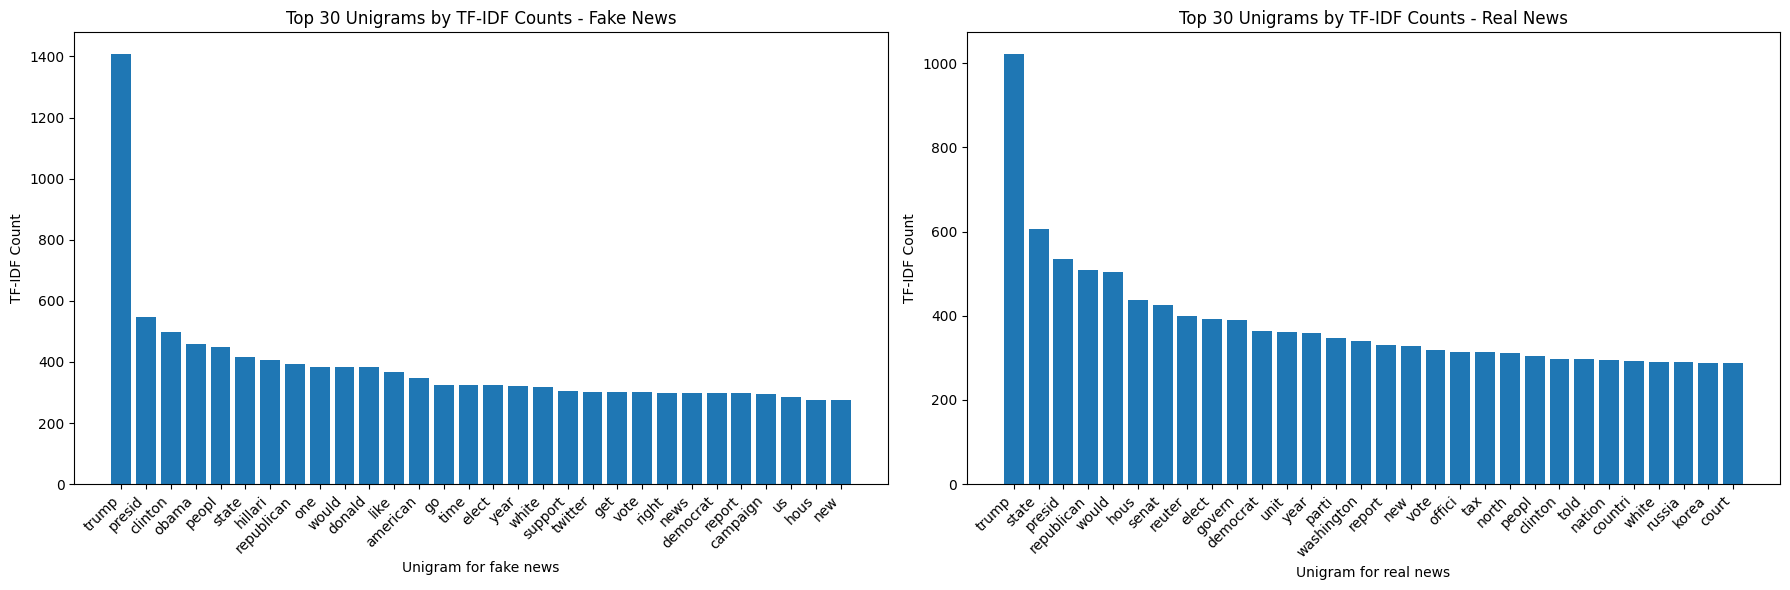

In [55]:
# Select the top 30 words for fake news
top_30_unigrams_fk = unigram_count_fk.head(30)
# Select the top 30 words for real news
top_30_unigrams_rl = unigram_count_rl.head(30)
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot top 30 unigrams for fake news
ax1.bar(top_30_unigrams_fk.index, top_30_unigrams_fk['TF-IDF Fake Count'])
ax1.set_xticklabels(top_30_unigrams_fk.index, rotation=45, ha='right')
ax1.set_xlabel('Unigram for fake news')
ax1.set_ylabel('TF-IDF Count')
ax1.set_title('Top 30 Unigrams by TF-IDF Counts - Fake News')

# Plot top 30 unigrams for real news
ax2.bar(top_30_unigrams_rl.index, top_30_unigrams_rl['TF-IDF Real Count'])
ax2.set_xticklabels(top_30_unigrams_rl.index, rotation=45, ha='right')
ax2.set_xlabel('Unigram for real news')
ax2.set_ylabel('TF-IDF Count')
ax2.set_title('Top 30 Unigrams by TF-IDF Counts - Real News')

plt.tight_layout()
plt.show()


In [56]:
# Top 50 Unique words that differentiate real and fake news for unigram

# Calculate the absolute difference in TF-IDF scores between fake and real news
unigram_count_fk['TF-IDF Real Count'] = unigram_count_rl['TF-IDF Real Count']
unigram_count_fk['TF-IDF Difference'] = abs(unigram_count_fk['TF-IDF Fake Count'] - unigram_count_fk['TF-IDF Real Count'])

# Sort the DataFrame by the TF-IDF difference in descending order to get the most distinguishing words
unigram_count_fk = unigram_count_fk.sort_values(by='TF-IDF Difference', ascending=False)

# Select the top 50 words that differentiate fake news
top_fake_words = unigram_count_fk[unigram_count_fk['TF-IDF Fake Count'] > unigram_count_fk['TF-IDF Real Count']].head(50).index.tolist()

# Select the top 50 words that differentiate real news
top_real_words = unigram_count_fk[unigram_count_fk['TF-IDF Real Count'] > unigram_count_fk['TF-IDF Fake Count']].head(50).index.tolist()

# Print the lists of top 50 unique words that differentiate fake and real news
print("Top 50 unique words differentiating fake news:")
print(top_fake_words)

print("\nTop 50 unique words differentiating real news:")
print(top_real_words)


Top 50 unique words differentiating fake news:
['trump', 'one', 'hillari', 'twitter', 'watch', 'us', 'black', 'clinton', 'know', 'like', 'obama', 'america', 'http', 'get', 'american', 'thing', 'go', 'peopl', 'gop', 'fact', 'gun', 'fox', 'women', 'actual', 'realli', 'lie', 'getti', 'live', 'hate', 'racist', 'think', 'man', 'media', 'donald', 'read', 'cnn', 'time', 'mr', 'stori', 'woman', 'everi', 'imag', 'tell', 'student', 'got', 'seem', 'guy', 'youtub', 'claim', 'news']

Top 50 unique words differentiating real news:
['reuter', 'minist', 'korea', 'china', 'north', 'senat', 'may', 'washington', 'state', 'eu', 'govern', 'tax', 'wednesday', 'thursday', 'region', 'unit', 'trade', 'hous', 'tuesday', 'friday', 'offici', 'european', 'sanction', 'monday', 'moscow', 'iran', 'nuclear', 'spokesman', 'britain', 'foreign', 'rule', 'prime', 'leader', 'ministri', 'committe', 'missil', 'meet', 'militari', 'myanmar', 'would', 'court', 'republican', 'legisl', 'turkey', 'parti', 'parliament', 'statement'

##### Observations: 
* Top unique words in Unigrams for Fake News:

      "Trump," "hillari, "twitter", "black," "clinton," etc.

* Top unique words in Unigrams for Real News:

      "reuter," "minister," "korea," "china," "washington," etc.

In [57]:
# Bi-gram for both dataset

# Create a TfidfVectorizer instance
tfidf_vectorizer_fk = TfidfVectorizer(ngram_range=(2, 2))
tfidf_vectorizer_rl = TfidfVectorizer(ngram_range=(2, 2))
# Fit and transform the processed_text column
tfidf_matrix_fk = tfidf_vectorizer_fk.fit_transform(fake['stem_text'])
tfidf_matrix_rl = tfidf_vectorizer_rl.fit_transform(real['stem_text'])
# Get the feature names (bigram tokens)
feature_names_fk = tfidf_vectorizer_fk.get_feature_names_out()
feature_names_rl = tfidf_vectorizer_rl.get_feature_names_out()
# Calculate the sum of TF-IDF values for each bigram across all documents
bigram_counts_fk = tfidf_matrix_fk.sum(axis=0)
bigram_counts_rl = tfidf_matrix_rl.sum(axis=0)
# Create a DataFrame with bigram words and their counts
bigram_count_fk = pd.DataFrame(bigram_counts_fk.T, index=feature_names_fk, columns=['TF-IDF Fake Count'])
bigram_count_rl = pd.DataFrame(bigram_counts_rl.T, index=feature_names_rl, columns=['TF-IDF Real Count'])
# Sort the DataFrame by count in descending order
bigram_count_fk = bigram_count_fk.sort_values(by='TF-IDF Fake Count', ascending=False)
bigram_count_rl = bigram_count_rl.sort_values(by='TF-IDF Real Count', ascending=False)
# Display the results
print(bigram_count_fk)
print('-----------------')
print(bigram_count_rl)

                 TF-IDF Fake Count
donald trump            233.315317
hillari clinton         140.056076
white hous              131.581147
unit state              113.061349
presid trump             97.867137
...                            ...
version mobil             0.003944
sb function               0.003944
sort alway                0.003944
version return            0.003944
conceal lest              0.003944

[1769552 rows x 1 columns]
-----------------
                   TF-IDF Real Count
unit state                201.420048
white hous                176.541740
donald trump              166.825085
north korea               157.662595
washington reuter         153.995237
...                              ...
florida announc             0.016181
counti aug                  0.016181
total sourc                 0.016181
zika palm                   0.016181
florida investig            0.016181

[1664053 rows x 1 columns]


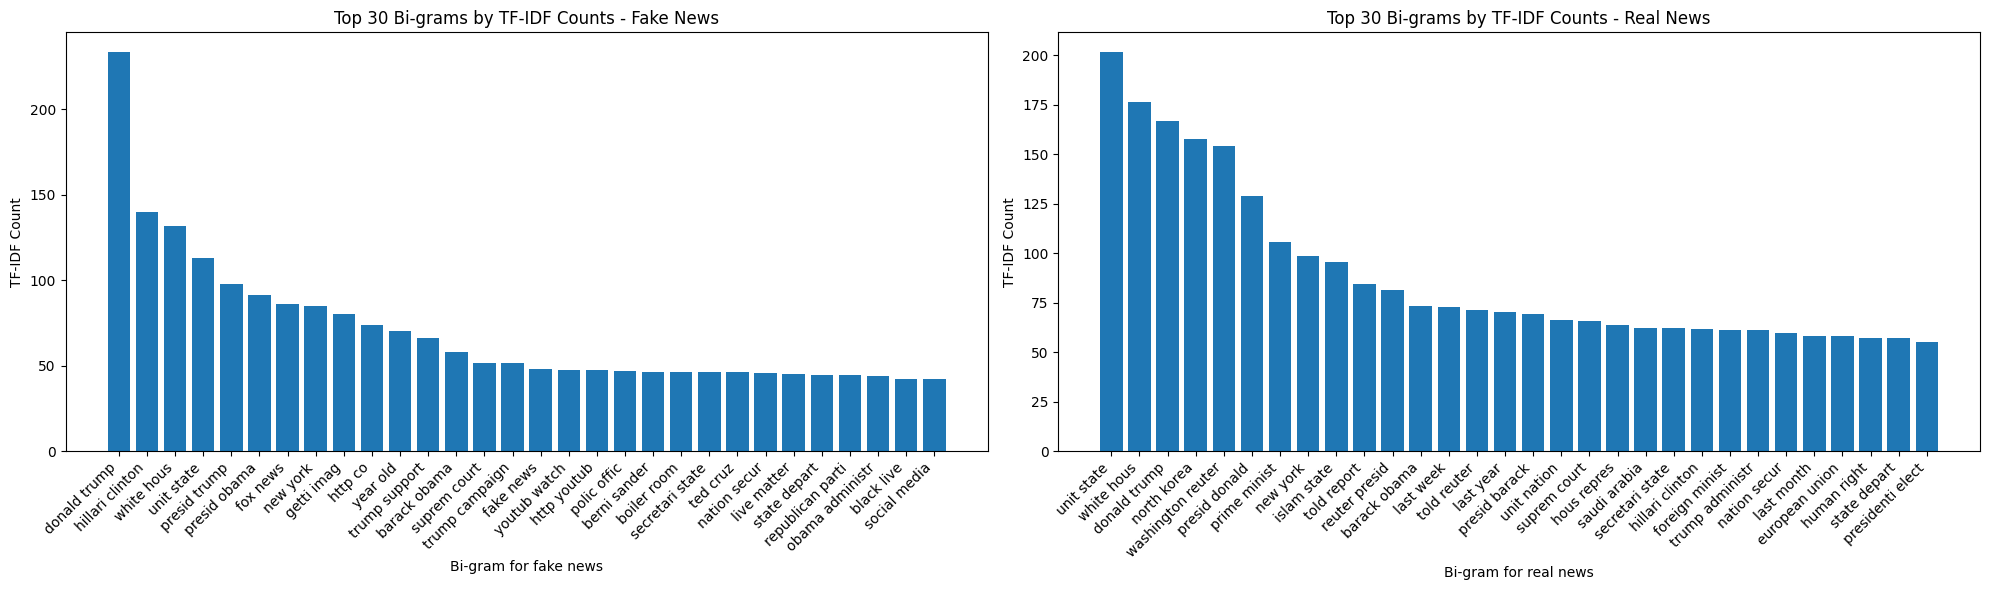

In [58]:
# Select the top 30 words for fake news
top_30_bigrams_fk = bigram_count_fk.head(30)
# Select the top 30 words for real news
top_30_bigrams_rl = bigram_count_rl.head(30)
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot top 30 Bi-grams for fake news
ax1.bar(top_30_bigrams_fk.index, top_30_bigrams_fk['TF-IDF Fake Count'])
ax1.set_xticklabels(top_30_bigrams_fk.index, rotation=45, ha='right')
ax1.set_xlabel('Bi-gram for fake news')
ax1.set_ylabel('TF-IDF Count')
ax1.set_title('Top 30 Bi-grams by TF-IDF Counts - Fake News')

# Plot top 30 Bi-grams for real news
ax2.bar(top_30_bigrams_rl.index, top_30_bigrams_rl['TF-IDF Real Count'])
ax2.set_xticklabels(top_30_bigrams_rl.index, rotation=45, ha='right')
ax2.set_xlabel('Bi-gram for real news')
ax2.set_ylabel('TF-IDF Count')
ax2.set_title('Top 30 Bi-grams by TF-IDF Counts - Real News')

plt.tight_layout()
plt.show()

In [59]:
# Top 50 Unique words that differentiate real and fake news for bigram

# Calculate the absolute difference in TF-IDF scores between fake and real news
bigram_count_fk['TF-IDF Real Count'] = bigram_count_rl['TF-IDF Real Count']
bigram_count_fk['TF-IDF Difference'] = abs(bigram_count_fk['TF-IDF Fake Count'] - bigram_count_fk['TF-IDF Real Count'])

# Sort the DataFrame by the TF-IDF difference in descending order to get the most distinguishing words
bigram_count_fk = bigram_count_fk.sort_values(by='TF-IDF Difference', ascending=False)

# Select the top 50 words that differentiate fake news
top_fake_words = bigram_count_fk[bigram_count_fk['TF-IDF Fake Count'] > bigram_count_fk['TF-IDF Real Count']].head(50).index.tolist()

# Select the top 50 words that differentiate real news
top_real_words = bigram_count_fk[bigram_count_fk['TF-IDF Real Count'] > bigram_count_fk['TF-IDF Fake Count']].head(50).index.tolist()

# Print the lists of top 50 unique words that differentiate fake and real news
print("Top 50 unique words differentiating fake news:")
print(top_fake_words)

print("\nTop 50 unique words differentiating real news:")
print(top_real_words)


Top 50 unique words differentiating fake news:
['presid obama', 'hillari clinton', 'presid trump', 'donald trump', 'fox news', 'trump support', 'live matter', 'black live', 'fake news', 'look like', 'polic offic', 'mainstream media', 'berni sander', 'gon na', 'illeg alien', 'bill clinton', 'centuri say', 'ted cruz', 'american peopl', 'breitbart news', 'african american', 'clinton foundat', 'becom member', 'white supremacist', 'first ladi', 'mr trump', 'right wing', 'last night', 'presid unit', 'washington post', 'daili mail', 'sexual assault', 'black peopl', 'anti trump', 'republican parti', 'white peopl', 'press confer', 'daili caller', 'sean hanniti', 'plan parenthood', 'pretti much', 'law enforc', 'health care', 'trump ralli', 'nation anthem', 'york time', 'high school', 'free speech', 'year old', 'secret servic']

Top 50 unique words differentiating real news:
['washington reuter', 'north korea', 'presid donald', 'unit state', 'prime minist', 'reuter presid', 'islam state', 'told r

### Observations: 
* Top unique words in Bigrams for Fake News:

      'presid obama', 'hillari clinton','presid trump', 'fox news', 'trump support',  'live matter' etc

* Top unique words in Bigrams for Real News:

      'washington reuter', 'north korea', 'presid donald', 'unit state', 'prime minist' etc

In [60]:
# Tri-gram for both dataset

# Create a TfidfVectorizer instance
tfidf_vectorizer_fk = TfidfVectorizer(ngram_range=(3, 3))
tfidf_vectorizer_rl = TfidfVectorizer(ngram_range=(3, 3))
# Fit and transform the processed_text column
tfidf_matrix_fk = tfidf_vectorizer_fk.fit_transform(fake['stem_text'])
tfidf_matrix_rl = tfidf_vectorizer_rl.fit_transform(real['stem_text'])
# Get the feature names (trigram tokens)
feature_names_fk = tfidf_vectorizer_fk.get_feature_names_out()
feature_names_rl = tfidf_vectorizer_rl.get_feature_names_out()
# Calculate the sum of TF-IDF values for each trigram across all documents
trigram_counts_fk = tfidf_matrix_fk.sum(axis=0)
trigram_counts_rl = tfidf_matrix_rl.sum(axis=0)
# Create a DataFrame with trigram words and their counts
trigram_count_fk = pd.DataFrame(trigram_counts_fk.T, index=feature_names_fk, columns=['TF-IDF Fake Count'])
trigram_count_rl = pd.DataFrame(trigram_counts_rl.T, index=feature_names_rl, columns=['TF-IDF Real Count'])
# Sort the DataFrame by count in descending order
trigram_count_fk = trigram_count_fk.sort_values(by='TF-IDF Fake Count', ascending=False)
trigram_count_rl = trigram_count_rl.sort_values(by='TF-IDF Real Count', ascending=False)
# Display the results
print(trigram_count_fk)
print('-----------------')
print(trigram_count_rl)

                          TF-IDF Fake Count
http youtub watch                 47.643549
black live matter                 38.617003
new york time                     35.260913
presid donald trump               30.825888
presid unit state                 28.980303
...                                     ...
traffick offens district           0.005351
heroin possess intent              0.005351
abet western district              0.005351
laplatney casper wy                0.005351
distribut least gram               0.005351

[3346337 rows x 1 columns]
-----------------
                          TF-IDF Real Count
presid donald trump              113.592949
presid barack obama               61.474432
washington reuter presid          55.513152
reuter presid donald              53.559641
elect donald trump                31.316673
...                                     ...
report three addit                 0.019395
zika case florida                  0.019395
total sourc world             

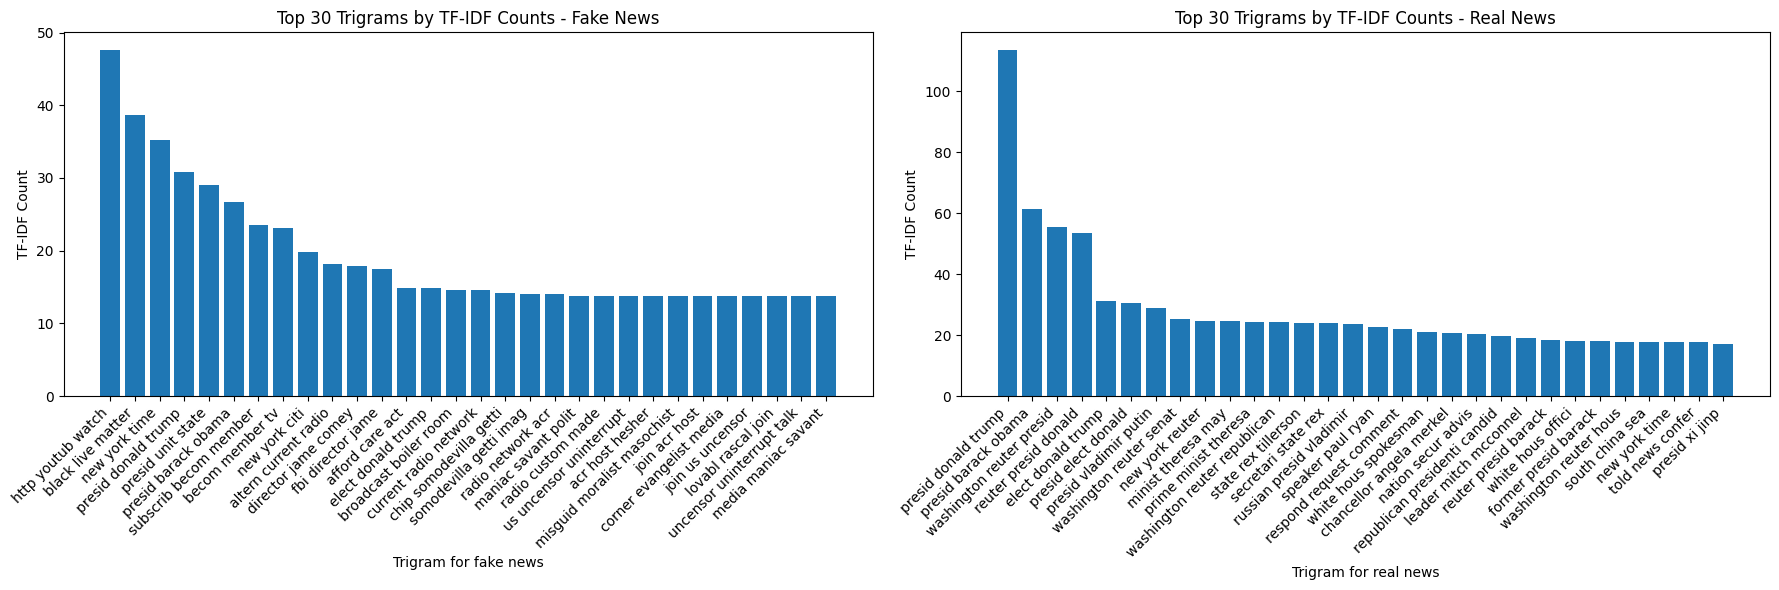

In [61]:
# Select the top 30 words for fake news
top_30_trigrams_fk = trigram_count_fk.head(30)
# Select the top 30 words for real news
top_30_trigrams_rl = trigram_count_rl.head(30)
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot top 30 trigrams for fake news
ax1.bar(top_30_trigrams_fk.index, top_30_trigrams_fk['TF-IDF Fake Count'])
ax1.set_xticklabels(top_30_trigrams_fk.index, rotation=45, ha='right')
ax1.set_xlabel('Trigram for fake news')
ax1.set_ylabel('TF-IDF Count')
ax1.set_title('Top 30 Trigrams by TF-IDF Counts - Fake News')

# Plot top 30 trigrams for real news
ax2.bar(top_30_trigrams_rl.index, top_30_trigrams_rl['TF-IDF Real Count'])
ax2.set_xticklabels(top_30_trigrams_rl.index, rotation=45, ha='right')
ax2.set_xlabel('Trigram for real news')
ax2.set_ylabel('TF-IDF Count')
ax2.set_title('Top 30 Trigrams by TF-IDF Counts - Real News')

plt.tight_layout()
plt.show()

In [62]:
# Top 50 Unique words that differentiate real and fake news for trigram

# Calculate the absolute difference in TF-IDF scores between fake and real news
trigram_count_fk['TF-IDF Real Count'] = trigram_count_rl['TF-IDF Real Count']
trigram_count_fk['TF-IDF Difference'] = abs(trigram_count_fk['TF-IDF Fake Count'] - trigram_count_fk['TF-IDF Real Count'])

# Sort the DataFrame by the TF-IDF difference in descending order to get the most distinguishing words
trigram_count_fk = trigram_count_fk.sort_values(by='TF-IDF Difference', ascending=False)

# Select the top 50 words that differentiate fake news
top_fake_words = trigram_count_fk[trigram_count_fk['TF-IDF Fake Count'] > trigram_count_fk['TF-IDF Real Count']].head(50).index.tolist()

# Select the top 50 words that differentiate real news
top_real_words = trigram_count_fk[trigram_count_fk['TF-IDF Real Count'] > trigram_count_fk['TF-IDF Fake Count']].head(50).index.tolist()

# Print the lists of top 50 unique words that differentiate fake and real news
print("Top 50 unique words differentiating fake news:")
print(top_fake_words)

print("\nTop 50 unique words differentiating real news:")
print(top_real_words)

Top 50 unique words differentiating fake news:
['black live matter', 'presid unit state', 'new york time', 'paul joseph watson', 'fox news host', 'support donald trump', 'white hous press', 'unit state america', 'saturday night live', 'donald trump januari', 'like donald trump', 'new york citi', 'suprem court justic', 'live matter movement', 'donald trump septemb', 'donald trump jr', 'donald trump presid', 'donald trump june', 'law enforc offic', 'vote hillari clinton', 'vote donald trump', 'hillari clinton campaign', 'year old girl', 'hous press secretari', 'donald trump octob', 'martin luther king', 'anti trump protest', 'press secretari sean', 'secretari sean spicer', 'donald trump februari', 'former realiti star', 'donald trump august', 'donald trump novemb', 'secret servic agent', 'donald trump march', 'dr ben carson', 'world war ii', 'sen john mccain', 'new york post', 'berni sander support', 'fbi director jame', 'donald trump support', 'nation secur advisor', 'first ladi melania

### Observations: 
* Top unique words in Trigrams for Fake News:

      'black live matter', 'presid unit state', 'new york time', 'paul joseph watson', 'fox news host', 'support donald trump', 'white hous press' etc

* Top unique words in Trigrams for Real News:

      'presid donald trump', 'reuter presid donald', 'presid barack obama', 'washington reuter senat',  'presid vladimir putin', 'presid elect donald', 'secretari state rex' etc

* From Uni ,Bi and trigram we can clearly observed that trigram gives more meaningful information about text.

### Sentiment analysis 

In [63]:
def sentiment_analysis(row):
    sentiment = TextBlob(row["stem_text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [64]:
fake[["subjectivity", "polarity"]] = fake.apply(lambda row: sentiment_analysis(row), axis=1)
real[["subjectivity", "polarity"]] = real.apply(lambda row: sentiment_analysis(row), axis=1)

# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score >= 0.05:
        return "Positive"
    elif score == -0.05:
        return "Negative"
    else:
        return "Neutral"
    
# Creating a New sentiment Column
fake["sentiments"] = fake["polarity"].apply(analysis)
real["sentiments"] = real["polarity"].apply(analysis)

In [65]:
fake.head()

,title,text,subject,date,Class,title_length,links_count,clean_text,tokenized_text,stem_text,subjectivity,polarity,sentiments
0,Donald Trump Sends Out Embarrassing New Years Eve Message; This is Disturbing,"donald trump just couldn t wish all americans a happy new year and leave it at that. instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. the former reality show star had just one job to do and he couldn t do it. as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year, president angry pants tweeted. 2018 will be a great year for america! as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year. 2018 will be a great year for america! donald j. trump (@realdonaldtrump) december 31, 2017trump s tweet went down about as welll as you d expect.what kind of president sends a new year s greeting like this despicable, petty, infantile gibberish? only trump! his lack of decency won t even allow him to rise above the gutter long enough to wish the american citizens a happy new year! bishop talbert swan (@talbertswan) december 31, 2017no one likes you calvin (@calvinstowell) december 31, 2017your impeachment would make 2018 a great year for america, but i ll also accept regaining control of congress. miranda yaver (@mirandayaver) december 31, 2017do you hear yourself talk? when you have to include that many people that hate you you have to wonder? why do the they all hate me? alan sandoval (@alansandoval13) december 31, 2017who uses the word haters in a new years wish?? marlene (@marlene399) december 31, 2017you can t just say happy new year? koren pollitt (@korencarpenter) december 31, 2017here s trump s new year s eve tweet from 2016.happy new year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. love! donald j. trump (@realdonaldtrump) december 31, 2016this is nothing new for trump. he s been doing this for years.trump has directed messages to his enemies and haters for new year s, easter, thanksgiving, and the anniversary of 9/11. pic.twitter.com/4fpae2kypa daniel dale (@ddale8) december 31, 2017trump s holiday tweets are clearly not presidential.how long did he work at hallmark before becoming president? steven goodine (@sgoodine) december 31, 2017he s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. roy schulze (@thbthttt) december 31, 2017who, apart from a teenager uses the term haters? wendy (@wendywhistles) december 31, 2017he s a fucking 5 year old who knows (@rainyday80) december 31, 2017so, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.photo by andrew burton/getty images.",News,2017-12-31,Fake,79,0,donald trump just couldn wish all americans happy new year and leave it at that instead he had to give shout out to his enemies haters and the very dishonest fake news media the former reality show star had just one job to do and he couldn do it as our country rapidly grows stronger and smarter want to wish all of my friends supporters enemies haters and even the very dishonest fake news media happy and healthy new year president angry pants tweeted will be great year for america as our country rapidly grows stronger and smarter want to wish all of my friends supporters enemies haters and even the very dishonest fake news media happy and healthy new year will be great year for america donald j trump december trump tweet went down about as welll as you expect what kind of president sends new year greeting like this despicable petty infantile gibberish only trump his lack of decency

In [66]:
real.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [67]:
# count of +ve,-ve & neutral sentiments of fake news
print(fake['sentiments'].value_counts())
# count of +ve,-ve & neutral sentiments of real news
real['sentiments'].value_counts()

sentiments
Positive    12520
Neutral     10230
Negative       36
Name: count, dtype: int64


sentiments
Positive    11112
Neutral     10063
Negative       34
Name: count, dtype: int64

## Exploratory Data Analysis (EDA) and Visualization Report

#### 1. Missing Dates in Fake News Dataset:
- There are 35 rows in the fake news dataset with the date labeled as "Nat," indicating invalid or missing date entries.
- All dates with null values are from fake news with a political background.

#### 2. Blank Descriptions:
- 626 fake news articles have blank descriptions, while only one such article exists in the real news dataset.

#### 3. Subjects in Fake News:
- Fake news has five subjects, with the 'news' subject having the highest rate of publishing fake news.
- The possibility of publishing fake news from US news & the Middle East subjects is very low.

#### 4. Subjects Comparison between Fake and Real News:
- News related to the 'worldnews' subject was more prevalent in the real news dataset.

#### 5. News Articles on Politics:
- Real news articles on the 'politics' topic outnumber fake news articles.

#### 6. Fake News Counts Over Time:
- The average number of fake news articles is around 600 per month.

#### 7. Real News Counts Over Time:
- Real news rates were highest in October, November, and December, with an average of around 600 articles per month.

#### 8. Fake News Release Dates:
- The analysis indicates that real news is more likely to be released at the end of the year.

#### 9. Fake News Counts in Middle of the Year:
- The middle of the year (January, April, May, June, July, August) saw the maximum rate of publishing fake news.

#### 10. Comparison of Fake and Real News Articles by Year:**
- The year 2016 saw a higher percentage of fake news articles compared to true news articles.
- In contrast, the year 2017 had more true news articles.

#### 11. Title Length in Fake and Real News:
- Real news titles tend to have shorter lengths, primarily up to 100 characters, while fake news titles can be longer, reaching up to 200 characters.

#### 12. Word "Reuters" in News Articles:
- The word "Reuters" is commonly found in the real news dataset, indicating a reputable US news agency.
- In contrast, it appears rarely in the fake news dataset.

#### 13. Presence of URLs:
- The percentage of URLs present in the fake dataset is 20%, while it is zero in real news.
- This feature could be important for identifying real and fake news.

#### 14. Word Clouds:
- The word cloud for fake news reveals prominent figures like Donald Trump, Hillary Clinton, and Barack Obama. Political party names and terms like "said" are also prevalent.
- The word cloud for real news depicts mentions of weekdays, months, and social issues like racism and the Islamic State. The news agency "Reuters," White House, and Donald Trump are commonly referenced.

#### 15. Unique Words Analysis:
- Unigrams, bigrams, and trigrams provide insights into the unique words used in fake and real news.
- Trigrams appear to provide the most meaningful information about the text.

### Conclusion:
- The analysis provides valuable insights into the differences between real and fake news articles.
- Features such as subject, title length, presence of URLs, and certain keywords like "Reuters" and prominent figures can be considered important for model building and identifying real and fake news.
- Further analysis may be required to understand the patterns in the fake news release dates and the reasons behind the missing dates in fake news articles.

## Step 5 Feature Engineering

#### Based on the insights and findings from the EDA and plots we are going to derive some important features so that it becomes an important feature for model building 

### Concanating both fake and real dataset.

In [52]:
combine_news = pd.concat([fake, real], axis=0,ignore_index=True)
combine_news.tail(2)

,title,text,subject,date,Class,title_length,links_count,clean_text,tokenized_text,stem_text
43993,Vatican upbeat on possibility of Pope Francis visiting Russia,"moscow (reuters) - vatican secretary of state cardinal pietro parolin said on tuesday that there was positive momentum behind the idea of pope francis visiting russia, but suggested there was more work to be done if it were to happen. parolin, speaking at a joint news conference in moscow alongside russian foreign minister sergei lavrov, did not give any date for such a possible visit. the eastern and western branches of christianity split apart in 1054. the pope, leader of the world s 1.2 billion catholics, is seeking to improve ties, and last year in cuba held what was the first ever meeting between a roman catholic pope and a russian orthodox patriarch. parolin said he had also used his talks in the russian capital to also raise certain difficulties faced by the catholic church in russia. he said that moscow and the vatican disagreed about the plight of christians in certain parts of the world. he did not elaborate. parolin, who is due later on tuesday to meet patriarch kirill, the head of the russian orthodox church, said he also believed russia could play an important role when it came to helping solve a crisis in venezuela because of its close relations with caracas.",worldnews,2017-08-22,True,61,0,moscow reuters vatican secretary of state cardinal pietro parolin said on tuesday that there was positive momentum behind the idea of pope francis visiting russia but suggested there was more work to be done if it were to happen parolin speaking at joint news conference in moscow alongside russian foreign minister sergei lavrov did not give any date for such possible visit the eastern and western branches of christianity split apart in the pope leader of the world billion catholics is seeking to improve ties and last year in cuba held what was the first ever meeting between roman catholic pope and russian orthodox patriarch parolin said he had also used his talks in the russian capital to also raise certain difficulties faced by the catholic church in russia he said that moscow and the vatican disagreed about the plight of christians in certain parts of the world he did not elaborate parolin who is due later on tuesday to meet patriarch kirill the head of the russian orthodox church said he also believed russia could play an important role when it came to helping solve crisis in venezuela because of its close relations with caracas,"[moscow, reuters, vatican, secretary, state, cardinal, pietro, parolin, tuesday, positive, momentum, behind, idea, pope, francis, visiting, russia, suggested, work, done, happen, parolin, speaking, joint, news, conference, moscow, alongside, russian, foreign, minister, sergei, lavrov, give, date, possible, visit, eastern, western, branches, christianity, split, apart, pope, leader, world, billion, catholics, seeking, improve, ties, last, year, cuba, held, first, ever, meeting, roman, catholic, pope, russian, orthodox, patriarch, parolin, also, used, talks, russian, capital, also, raise, certain, difficulties, faced, catholic, church, russia, moscow, vatican, disagreed, plight, christians, certain, parts, world, elaborate, parolin, due, later, tuesday, meet, patriarch, kirill, head, russian, orthodox, church, also, believed, ...]",moscow reuter vatican secretari state cardin pietro parolin tuesday posit momentum behind idea pope franci visit russia suggest work done happen parolin speak joint news confer moscow alongsid russian foreign minist sergei lavrov give date possibl visit eastern western branch christian split apart pope leader world billion cathol seek improv tie last year cuba held first ever meet roman cathol pope russian orthodox patriarch parolin also use talk russian capit also rais certain difficulti face cathol church russia moscow vatican disagre plight christian certain part world elabor parolin due later tuesday meet patri

In [53]:
# creating new column with reuters word
combine_news['Reuters_present'] = combine_news['text'].str.contains(r'\(reuters\)')
combine_news['Reuters_present'].value_counts()

Reuters_present
False    22946
True     21049
Name: count, dtype: int64

In [54]:
combine_news['text_blank']=np.where(combine_news['text']==' ',True, False)

In [55]:
pd.crosstab(combine_news['Class'],combine_news['Reuters_present'])

Reuters_present,False,True
Class,,
Fake,22777,9
True,169,21040


In [56]:
combine_news.columns

Index(['title', 'text', 'subject', 'date', 'Class', 'title_length',
       'links_count', 'clean_text', 'tokenized_text', 'stem_text',
       'Reuters_present', 'text_blank'],
      dtype='object')

In [57]:
# Accessing only important columns for model building
df=combine_news[['title_length','links_count','Reuters_present','stem_text','Class','text_blank']]
print(df.shape)
df.head()

(43995, 6)


,title_length,links_count,Reuters_present,stem_text,Class,text_blank
0,79,0,False,donald trump wish american happi new year leav instead give shout enemi hater dishonest fake news media former realiti star one job countri rapidli grow stronger smarter want wish friend support enemi hater dishonest fake news media happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater dishonest fake news media happi healthi new year great year america donald j trump decemb trump tweet went welll expect kind presid send new year greet like despic petti infantil gibberish trump lack decenc allow rise gutter long enough wish american citizen happi new year bishop talbert swan decemb one like calvin decemb impeach would great year america also accept regain control congress miranda yaver decemb hear talk includ mani peopl hate wonder hate alan sandov decemb use word hater new year wish marlen decemb happi new year koren pollitt decemb trump new year eve tweet happi new year includ mani enemi fought lost badli know love donald j trump decemb noth new trump year trump direct messag enemi hater new year easter thanksgiv anniversari twitter fpaekypa daniel dale decemb trump holiday tweet clearli presidenti long work hallmark becom presid steven goodin decemb alway like differ last year filter break roy schulz decemb apart teenag use term hater wendi decemb fuck year old know decemb peopl vote hole think would chang got power wrong year old men chang year older photo andrew burton getti imag,Fake,False
1,69,0,False,hous intellig committe chairman devin nune go bad day assumpt like mani us christoph steel dossier prompt russia investig lash depart justic fbi order protect trump happen dossier start investig accord document obtain new york time former trump campaign advis georg papadopoulo drunk wine bar reveal knowledg russian opposit research hillari clinton top papadopoulo covfef boy trump administr alleg much larger role none damn drunken fool wine bar coffe boy help arrang new york meet trump presid abdel fattah el sisi egypt two month elect known former aid set meet world leader trump team trump ran mere coffe boy papadopoulo reveal australian diplomat alexand downer russian offici shop around possibl dirt democrat presidenti nomine hillari clinton exactli much mr papadopoulo night kensington wine room australian alexand downer unclear report state two month later leak democrat email began appear onlin australian offici pass inform mr papadopoulo american counterpart accord four current former american foreign offici direct knowledg australian role papadopoulo plead guilti lie f b cooper wit special counsel robert mueller team presid badli script realiti tv photo win mcname getti imag,Fake,False
2,90,1,False,friday reveal former milwauke sheriff david clark consid homeland secur secretari donald trump administr email scandal januari brief run plane clark fellow passeng dan black later detain polic reason whatsoev except mayb feel hurt clark messag polic stop black deplan search warrant execut fbi see exchang clark call fake news though copi search warrant internet unintimid lib media attempt smear discredit fake news report design silenc former sheriff tweet continu poke eye sharp stick bitch slap scum bag til get attack better peopl maga unintimid lib media attempt smear discredit fake news report design silenc continu poke eye sharp stick bitch slap scum bag til get attack better peopl maga twitter xtzwpdub david clark jr decemb stop break news lie lib media make fake news smear antidot go right punch nose tast blood noth get bulli like lie lib media attent better give tast blood neverbackdown twitter tnypshcr david clark jr decemb internet call local newspap search warrant fake chose file charg time mean especi continu lie month decis charg clark email search warrant file http co zcbycwpb keithleblanc decemb hope rest villag peopl implic kirk ketchum decemb slaw

In [58]:
# Encoding categorical columns into numerical
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Reuters_present']=encoder.fit_transform(df['Reuters_present'])
df['text_blank']=encoder.fit_transform(df['text_blank'])
df['Class']=encoder.fit_transform(df['Class'])
df.head(20)

,title_length,links_count,Reuters_present,stem_text,Class,text_blank
0,79,0,0,donald trump wish american happi new year leav instead give shout enemi hater dishonest fake news media former realiti star one job countri rapidli grow stronger smarter want wish friend support enemi hater dishonest fake news media happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater dishonest fake news media happi healthi new year great year america donald j trump decemb trump tweet went welll expect kind presid send new year greet like despic petti infantil gibberish trump lack decenc allow rise gutter long enough wish american citizen happi new year bishop talbert swan decemb one like calvin decemb impeach would great year america also accept regain control congress miranda yaver decemb hear talk includ mani peopl hate wonder hate alan sandov decemb use word hater new year wish marlen decemb happi new year koren pollitt decemb trump new year eve tweet happi new year includ mani enemi fought lost badli know love donald j trump decemb noth new trump year trump direct messag enemi hater new year easter thanksgiv anniversari twitter fpaekypa daniel dale decemb trump holiday tweet clearli presidenti long work hallmark becom presid steven goodin decemb alway like differ last year filter break roy schulz decemb apart teenag use term hater wendi decemb fuck year old know decemb peopl vote hole think would chang got power wrong year old men chang year older photo andrew burton getti imag,0,0
1,69,0,0,hous intellig committe chairman devin nune go bad day assumpt like mani us christoph steel dossier prompt russia investig lash depart justic fbi order protect trump happen dossier start investig accord document obtain new york time former trump campaign advis georg papadopoulo drunk wine bar reveal knowledg russian opposit research hillari clinton top papadopoulo covfef boy trump administr alleg much larger role none damn drunken fool wine bar coffe boy help arrang new york meet trump presid abdel fattah el sisi egypt two month elect known former aid set meet world leader trump team trump ran mere coffe boy papadopoulo reveal australian diplomat alexand downer russian offici shop around possibl dirt democrat presidenti nomine hillari clinton exactli much mr papadopoulo night kensington wine room australian alexand downer unclear report state two month later leak democrat email began appear onlin australian offici pass inform mr papadopoulo american counterpart accord four current former american foreign offici direct knowledg australian role papadopoulo plead guilti lie f b cooper wit special counsel robert mueller team presid badli script realiti tv photo win mcname getti imag,0,0
2,90,1,0,friday reveal former milwauke sheriff david clark consid homeland secur secretari donald trump administr email scandal januari brief run plane clark fellow passeng dan black later detain polic reason whatsoev except mayb feel hurt clark messag polic stop black deplan search warrant execut fbi see exchang clark call fake news though copi search warrant internet unintimid lib media attempt smear discredit fake news report design silenc former sheriff tweet continu poke eye sharp stick bitch slap scum bag til get attack better peopl maga unintimid lib media attempt smear discredit fake news report design silenc continu poke eye sharp stick bitch slap scum bag til get attack better peopl maga twitter xtzwpdub david clark jr decemb stop break news lie lib media make fake news smear antidot go right punch nose tast blood noth get bulli like lie lib media attent better give tast blood neverbackdown twitter tnypshcr david clark jr decemb internet call local newspap search warrant fake chose file charg time mean especi continu lie month decis charg clark email search warrant file http co zcbycwpb keithleblanc decemb hope rest villag peopl implic kirk ketchum decemb slaw bake potato french fri tw

In [59]:
# applying minmax scaler 
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(df[['title_length','links_count','Reuters_present','text_blank']])
df1

array([[0.23616236, 0.        , 0.        , 0.        ],
       [0.19926199, 0.        , 0.        , 0.        ],
       [0.27675277, 0.04545455, 0.        , 0.        ],
       ...,
       [0.12546125, 0.        , 1.        , 0.        ],
       [0.1697417 , 0.        , 1.        , 0.        ],
       [0.13653137, 0.        , 1.        , 0.        ]])

In [60]:
# Convert the array to a DataFrame
df1 = pd.DataFrame(df1, columns=['title_length','links_count','Reuters_present','text_blank'])
df1.head()

,title_length,links_count,Reuters_present,text_blank
0,0.236162,0.000000,0.0,0.0
1,0.199262,0.000000,0.0,0.0
2,0.276753,0.045455,0.0,0.0
3,0.232472,0.181818,0.0,0.0
4,0.202952,0.000000,0.0,0.0


In [61]:
df= pd.concat([df1,df['stem_text'],df['Class']], axis=1)
df.head()

,title_length,links_count,Reuters_present,text_blank,stem_text,Class
0,0.236162,0.000000,0.0,0.0,donald trump wish american happi new year leav instead give shout enemi hater dishonest fake news media former realiti star one job countri rapidli grow stronger smarter want wish friend support enemi hater dishonest fake news media happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater dishonest fake news media happi healthi new year great year america donald j trump decemb trump tweet went welll expect kind presid send new year greet like despic petti infantil gibberish trump lack decenc allow rise gutter long enough wish american citizen happi new year bishop talbert swan decemb one like calvin decemb impeach would great year america also accept regain control congress miranda yaver decemb hear talk includ mani peopl hate wonder hate alan sandov decemb use word hater new year wish marlen decemb happi new year koren pollitt decemb trump new year eve tweet happi new year includ mani enemi fought lost badli know love donald j trump decemb noth new trump year trump direct messag enemi hater new year easter thanksgiv anniversari twitter fpaekypa daniel dale decemb trump holiday tweet clearli presidenti long work hallmark becom presid steven goodin decemb alway like differ last year filter break roy schulz decemb apart teenag use term hater wendi decemb fuck year old know decemb peopl vote hole think would chang got power wrong year old men chang year older photo andrew burton getti imag,0
1,0.199262,0.000000,0.0,0.0,hous intellig committe chairman devin nune go bad day assumpt like mani us christoph steel dossier prompt russia investig lash depart justic fbi order protect trump happen dossier start investig accord document obtain new york time former trump campaign advis georg papadopoulo drunk wine bar reveal knowledg russian opposit research hillari clinton top papadopoulo covfef boy trump administr alleg much larger role none damn drunken fool wine bar coffe boy help arrang new york meet trump presid abdel fattah el sisi egypt two month elect known former aid set meet world leader trump team trump ran mere coffe boy papadopoulo reveal australian diplomat alexand downer russian offici shop around possibl dirt democrat presidenti nomine hillari clinton exactli much mr papadopoulo night kensington wine room australian alexand downer unclear report state two month later leak democrat email began appear onlin australian offici pass inform mr papadopoulo american counterpart accord four current former american foreign offici direct knowledg australian role papadopoulo plead guilti lie f b cooper wit special counsel robert mueller team presid badli script realiti tv photo win mcname getti imag,0
2,0.276753,0.045455,0.0,0.0,friday reveal former milwauke sheriff david clark consid homeland secur secretari donald trump administr email scandal januari brief run plane clark fellow passeng dan black later detain polic reason whatsoev except mayb feel hurt clark messag polic stop black deplan search warrant execut fbi see exchang clark call fake news though copi search warrant internet unintimid lib media attempt smear discredit fake news report design silenc former sheriff tweet continu poke eye sharp stick bitch slap scum bag til get attack better peopl maga unintimid lib media attempt smear discredit fake news report design silenc continu poke eye sharp stick bitch slap scum bag til get attack better peopl maga twitter xtzwpdub david clark jr decemb stop break news lie lib media make fake news smear antidot go right punch nose tast blood noth get bulli like lie lib media attent better give tast blood neverbackdown twitter tnypshcr david clark jr decemb internet call local newspap search warrant fake chose file charg time mean especi continu lie month decis charg clark email search warrant file http co zcbycwpb keithleblanc decemb hope rest villag peopl impl

### Word Embedding/Vectorization
-Word embeddings is a technique where individual words are transformed into a numerical representation of the word (a vector). Where each word is mapped to one vector.there are 2 type of WE,


  1.Frequncy Based Embedding
  
       i) CV
      ii) TF-IDF
  2.Prediction based embedding
  
       i) Word2Vec

#### Using tf-idf 

In [62]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['stem_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,abl,abort,absolut,abus,accept,access,accord,account,accus,across,...,worri,would,write,wrong,wrote,ye,year,yet,york,young
0,0.0,0.0,0.0,0.0,0.046745,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.041924,0.0,0.04919,0.0,0.0,0.412166,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.000000,0.00000,0.127286,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.158727,0.000000
2,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.022464,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.078012,0.0,0.00000,0.0,0.0,0.028406,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.080725,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.069513,0.000000,0.083646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43990,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.073893,0.0,0.00000,0.0,0.0,0.053812,0.000000,0.000000,0.000000
43991,0.0,0.0,0.0,0.0,0.000000,0.13213,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.124316,0.000000,0.000000,0.000000
43992,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.170037,0.000000,0.000000,0.000000
43993,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.052387,0.000000,0.000000,0.000000


In [73]:
import pickle
# save the trained TF_IDF vectorizer to a file
with open('tfidf_vectorizer.pkl','wb') as f:
    pickle.dump(tfidf_vectorizer,f)

In [63]:
df_pro = pd.concat([df, tfidf_df], axis=1)
df_pro.drop(columns=['stem_text','Class'],axis=1, inplace=True)
df_pro.head()

,title_length,links_count,Reuters_present,text_blank,abl,abort,absolut,abus,accept,access,...,worri,would,write,wrong,wrote,ye,year,yet,york,young
0,0.236162,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.046745,0.0,...,0.0,0.041924,0.0,0.04919,0.0,0.0,0.412166,0.000000,0.000000,0.000000
1,0.199262,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.158727,0.000000
2,0.276753,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.022464,0.000000,0.000000,0.000000
3,0.232472,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.078012,0.0,0.00000,0.0,0.0,0.028406,0.000000,0.000000,0.000000
4,0.202952,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.080725,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.069513,0.000000,0.083646


In [66]:
import pickle
# save the trained TF_IDF vectorizer to a file
with open('df_pro.pkl','wb') as f:
    pickle.dump(df_pro,f)

In [67]:
# separating feature and target column
X= df_pro
y=df['Class']

In [68]:
# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Feature Engineering Report

#### 1. Added Columns based on EDA:
a. **Length of Title (int):**
   - We calculated the length of each news article's title and added it as a new feature in the dataset. This feature represents the number of characters in the title.

b. **Link Count in the Text (int):**
   - We analyzed the text column to count the number of URLs or hyperlinks present in each news article. This count was added as a new feature in the dataset, representing the number of links in the article.

c. **Reuters Present or Absent (boolean):**
   - Based on the analysis of the news agency name "Reuters" in the EDA, we added a new boolean feature to indicate whether the news article mentions "Reuters" (True) or not (False).

d. **Text Blank (boolean):**
   - During the EDA, we identified articles with blank text descriptions. We added a new boolean feature to indicate whether the text field is blank (True) or contains some information (False).

#### 2. Performed TF-IDF and Word2Vec:
   - To process the text data and convert it into numerical vectors, we applied two popular techniques: TF-IDF and Word2Vec.
   - TF-IDF (Term Frequency-Inverse Document Frequency) was used to represent the importance of each word in the text with respect to the entire dataset.
   - Word2Vec was utilized to create word embeddings, i.e., dense vector representations of words, capturing their semantic relationships.

#### 3. Performed Min-Max Scaler:
   - After obtaining numerical features from TF-IDF and Word2Vec, we applied the Min-Max Scaler to scale all features to a specific range (usually [0, 1]).
   - Scaling helps in bringing all the features to a similar magnitude, preventing any particular feature from dominating the model due to its larger scale.

#### 4. Data Splitting:
   - We split the dataset into two parts: features (X) and target variable (y).
   - The features (X) consist of all the engineered features, including the length of the title, link count, Reuters presence, TF-IDF vectors, and Word2Vec embeddings.
   - The target variable (y) contains the labels indicating whether each news article is real (1) or fake (0).
   
#### 5. Train-Test Split:
   - To evaluate the performance of the machine learning model, we further split the dataset into training and testing sets.
   - The training set is used to train the model, while the testing set is used to assess its generalization and performance on unseen data.

### Conclusion:
   - Feature engineering is a crucial step in preparing the data for machine learning models.
   - We added several meaningful features based on the insights gained from the Exploratory Data Analysis (EDA).
   - By incorporating features like length of title, link count, Reuters presence, and text blankness, we aim to improve the model's ability to distinguish between real and fake news.
   - The use of TF-IDF and Word2Vec allows us to represent the text data numerically, capturing semantic relationships and word importance.
   - Scaling the features ensures that they are on a similar scale, preventing any feature from dominating the model based solely on its magnitude.
   - The dataset is now ready for building a machine learning model to classify news articles as real or fake based on the engineered features.

## Step 6 Model building for TF-IDF

### Logistic Regression

In [83]:
#Initialising Logistic Regression model
log_reg = LogisticRegression(random_state=42)
#Fitting the model on train data
log_reg.fit(X_train,y_train)
#Finding the accuracy score on test data
acc = log_reg.score(X_test,y_test)
print (acc)

0.9973860665984771


In [84]:
y_pred=log_reg.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

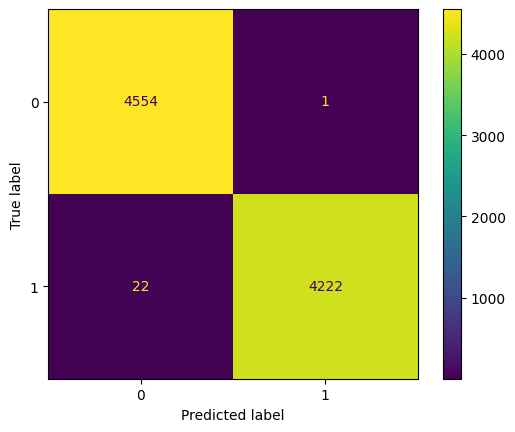

In [85]:
confu = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confu, display_labels = [0,1])
cm_display.plot()
plt.show()

In [86]:
# using kfold-cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(log_reg, X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-validated accuracy scores:", scores)

Cross-validated accuracy scores: [0.99801136 0.99730075 0.99715869 0.99815315 0.99659042]


In [87]:
print("Mean accuracy score:", np.mean(scores))

Mean accuracy score: 0.9974428750855623


In [88]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4555
           1       1.00      0.99      1.00      4244

    accuracy                           1.00      8799
   macro avg       1.00      1.00      1.00      8799
weighted avg       1.00      1.00      1.00      8799



### Navie bayes

In [74]:
from sklearn.naive_bayes import MultinomialNB
# Initialsing a naive bayes classifier
nb = MultinomialNB()
# Fitting the model on train data
nb.fit(X_train, y_train)
# Finding the accuracy score of model on test data
nb_acc = nb.score(X_test, y_test)
print(nb_acc)

0.9863620866007501


### SVM

In [71]:
from sklearn.svm import SVC
#Initialising a support vector model with linear kernel
svc = SVC(kernel="linear", random_state=0)
#Fitting the model on train data
svc.fit(X_train,y_train)
#Finding the accuracy score of the model on test data
svc_score=svc.score(X_test,y_test)
print(svc_score)

0.9980679622684396


In [91]:
# Combining all Models accuracies and forming Dataframe
final_data_acc = pd.DataFrame({'Models':['LogisticReg','SVM','NaiveBayes'],
                          'Accuracy': [acc*100,svc_score*100,nb_acc*100]})
final_data_acc

,Models,Accuracy
0,LogisticReg,99.738607
1,SVM,99.806796
2,NaiveBayes,98.636209


## Using Word2Vec
          - In many NLP tasks, understanding the context and meaning of words is essential. Word embeddings help disambiguate words with multiple meanings based on their surrounding words. This is valuable in tasks like word sense disambiguation and coreference resolution.
          - Word2Vec allowing algorithms to understand language more contextually and semantically. They    have become an essential component in various NLP pipelines and have significantly improved the performance of many language-related tasks.

In [92]:
# Train the Word2Vec model with vector_size=1000
model = Word2Vec(sentences=combine_news['tokenized_text'], vector_size=1000, window=5)
# Save the trained model
model.save("word2vec_model_1000d.bin")
# Get the word vector for a specific word (e.g., 'machine')
word_vector = model.wv['trump']
print(f"Vector representation of 'trump': {word_vector}")

Vector representation of 'trump': [-4.83795792e-01  2.09369659e-01  8.67721438e-02 -9.88635197e-02
  6.02693915e-01 -9.05916095e-01  1.31314933e-01  7.09183633e-01
  5.92409372e-01  2.22660109e-01  5.59702478e-02  7.69055486e-01
 -2.38333885e-02  2.63176441e-01 -4.89899278e-01 -4.30806905e-01
 -4.28327739e-01 -2.28768915e-01  7.77913481e-02 -6.19287610e-01
  6.82341695e-01  1.29515266e+00  5.47608078e-01  1.04441524e-01
  6.09865308e-01 -2.46936277e-01 -4.41994905e-01  4.39228415e-01
  2.63118446e-02  3.12551290e-01  2.65058190e-01 -3.36740673e-01
 -1.04697235e-01 -7.50702694e-02 -1.66648984e-01 -2.87511289e-01
 -3.24085921e-01 -4.30912673e-01 -2.58392006e-01 -6.47089839e-01
  1.67723551e-01 -2.71467358e-01 -3.53806347e-01 -6.14250302e-01
  8.07918385e-02 -5.98597974e-02 -4.95919406e-01  1.05039382e+00
  4.19002771e-01 -4.33315076e-02 -3.14716697e-02 -6.12818241e-01
  3.91250312e-01  2.04886526e-01 -5.39598614e-02 -7.01456904e-01
 -2.06592292e-01 -3.62385213e-01  3.11086386e-01 -5.5229

In [93]:
# Get similar words to a given word
similar_words = model.wv.most_similar('trump', topn=5)
similar_words

[('elect', 0.5070198178291321),
 ('conway', 0.38275665044784546),
 ('romney', 0.3819959759712219),
 ('candidacy', 0.37898141145706177),
 ('presumptive', 0.3745447099208832)]

### Model Building with Word2Vec

#### Logistic Regression

In [94]:
# Load pre-trained Word2Vec model (replace with your own trained model if available)
word2vec_model = Word2Vec.load("word2vec_model_1000d.bin")
# Tokenize the sentences into words and preprocess (lowercase)
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in df['stem_text']]

# Convert text data to word embeddings
word_embeddings = []
for sentence in tokenized_sentences:
    embeddings = [word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv]
    if embeddings:
        avg_embedding = np.mean(embeddings, axis=0)
    else:
        avg_embedding = np.zeros(word2vec_model.vector_size)
    word_embeddings.append(avg_embedding)

X_word_embeddings = np.vstack(word_embeddings)
# Other numerical columns
X_other_features = df[['title_length','links_count','Reuters_present']].values

# Combine word embeddings and other features
X = np.hstack((X_word_embeddings, X_other_features))
y = df['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a simple Logistic Regression model
model_we = LogisticRegression()
model_we.fit(X_train, y_train)

# Evaluate the model
accuracy = model_we.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9976133651551312


#### SVM

In [77]:
#Initialising a support vector model with linear kernel
svc_we = SVC(kernel="linear", random_state=0)
#Fitting the model on train data
svc_we.fit(X_train,y_train)
#Finding the accuracy score of the model on test data
svc_score_we=svc_we.score(X_test,y_test)
print(svc_score_we)

0.9980679622684396


In [96]:
# Combining all Models accuracies and forming Dataframe
final_data_acc_we = pd.DataFrame({'Models':['LogisticReg','SVM'],
                          'Accuracy': [accuracy*100,svc_score_we*100]})
final_data_acc_we

,Models,Accuracy
0,LogisticReg,99.761337
1,SVM,99.761337


## Model Building Report

In this report, we describe the process of building and evaluating three machine learning models for classifying news articles as real or fake. The models used are Logistic Regression, Naive Bayes, and Support Vector Machine (SVM). We have calculated the accuracy of each model to assess its performance.

### 1. Data Preprocessing:
- Before model building, we performed data preprocessing, which involved feature engineering, TF-IDF, Word2Vec, and Min-Max scaling, as described in the Feature Engineering Report.

### 2. Model Building:

#### a. Logistic Regression:
- Logistic Regression is a widely used classification algorithm that works well for binary classification tasks like our real/fake news classification.
- We trained a Logistic Regression model using the engineered features and the target variable.
- The model achieved an accuracy of 99.74%.

#### b. Naive Bayes:
- Naive Bayes is a probabilistic algorithm based on Bayes' theorem. It is often used for text classification tasks and has shown good performance in various NLP tasks.
- We trained a Naive Bayes model using the same feature set and target variable.
- The model achieved an accuracy of 98.64%.

#### c. Support Vector Machine (SVM):
- SVM is a powerful algorithm for classification tasks that aims to find the optimal hyperplane to separate different classes in a high-dimensional feature space.
- We trained an SVM model using the engineered features and the target variable.
- The model achieved an impressive accuracy of 99.81%.

### 3. Model Evaluation:
- We evaluated the models on a separate testing dataset to assess their performance on unseen data.
- The evaluation metrics used included accuracy, which measures the overall correctness of the model's predictions.

### 4. Model Comparison:

| Model             | Accuracy     |
|-------------------|--------------|
| Logistic Regression |99.74%     |
| Naive Bayes       | 98.64%       |
| Support Vector Machine | 99.81%     |

### Conclusion:
- All three models performed exceptionally well in classifying news articles as real or fake.
- The Support Vector Machine (SVM) achieved the highest accuracy of 99.81%, indicating its effectiveness for this particular task.
- Logistic Regression also performed impressively with an accuracy of 99.74%.
- Naive Bayes achieved a respectable accuracy of 98.64%.
- Based on accuracy alone, the Support Vector Machine is the best-performing model for this real/fake news classification task.

## Step 7 Deployment 

#### SVM model with tf-idf vectorization technique gives best Accuracy hence we will be using TFIDF and SVM

### Deploymenet will be done on streamlit and files can be accessed form github directory 
link - https://github.com/Yash-Dhoble/News_Analysis_NLP

In [76]:
filename = 'final_nb_nlp_model.pkl'
pickle.dump(nb, open(filename,'wb'))
pickled_model=pickle.load(open('final_nb_nlp_model.pkl','rb'))